# Proyek Akhir: Menyelesaikan Permasalahan Human Resources

- Nama: Michelle Angelina
- Email: zmichelleangelina@gmail.com
- ID Dicoding: mchelle_angelina

## Persiapan

### Menyiapkan library yang dibutuhkan

In [178]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind, mannwhitneyu

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import (
    accuracy_score, log_loss, classification_report,
    confusion_matrix, roc_auc_score, RocCurveDisplay
)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History
from tensorflow.keras.models import load_model

from IPython.display import display
from ipywidgets import FileUpload

!pip freeze > requirements.txt /dev/null 2>&1
!cat requirements.txt /dev/null 2>&1

absl-py==1.4.0
accelerate==1.5.2
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.1
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.3.31.0.36.18
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.42.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.2.1
blosc2==3.2.1
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6


### Menyiapkan data yang akan digunakan

In [2]:
from google.colab import files
uploaded = files.upload()

Saving employee_data.csv to employee_data.csv


## Data Understanding

**Business Understanding:**

- Tujuan: Mengidentifikasi faktor yang memengaruhi attrition rate tinggi (>10%) dan bantu HR memonitor faktor-faktor tersebut.

- Problem Statement (Pertanyaan Bisnis): **Apa saja faktor signifikan yang menyebabkan karyawan resign dari perusahaan Jaya Jaya Maju?**

- Target: Mengetahui variabel paling berpengaruh terhadap attrition.

In [106]:
df = pd.read_csv('employee_data.csv')

### Data Information

In [107]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


Dataset berhasil dikenali dan siap diolah.

In [108]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


- Terdapat 1470 baris data dengan 35 kolom informasi.
- Jumlah count hanya 1058 baris pada kolom `Attrition`, sedangkan total terdapat 1470 baris data. Dapat disimpulkan terdapat 412 data kosong pada kolom tersebut.
- `std = 0, min = max = 1` dan `std = 0, min = max = 80` pada kolom `EmployeeCount` dan `StandardHours`. Karena semua nilainya sama, tidak berguna untuk analisis.
- `MonthlyIncome`, `MonthlyRate`, `DailyRate`, `NumCompaniesWorked` terlihat punya rentang besar dan ada kemungkinan distribusi miring (skewed). Kolom tersebut akan ditinjau lebih dalam.

In [109]:
df.nunique()

,0
EmployeeId,1470
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1


- Kolom `EmployeeCount`, `Over18`, dan `StandardHours` tidak memiliki variasi. Karena semua nilainya sama, terbukti kurang berguna untuk analisis.
- Beberapa kolom dengan variasi data 2-9 bisa diberikan Encoding.

In [110]:
df['Attrition'].value_counts(normalize=True)

,proportion
Attrition,
0.0,0.830813
1.0,0.169187


Penjelasan: Attrition - Did the employee attrition? (0=no, 1=yes)

- Sekitar 17% karyawan keluar, **attrition rate: 17%**.
- Ada ketidakseimbangan data jika digunakan untuk membuat model machine learning. Hal ini akan memerlukan weighing class.

 ### Kesimpulan:
- Data total ada 1470 baris data dengan 35 kolom informasi
- Terdapat 412 data kosong pada kolom Attrition
- Beberapa kolom memiliki rentang besar
- Beberapa kolom tidak memiliki variasi data sehingga tidak diperlukan untuk analisis
- Beberapa kolom bisa menggunakan Encoding
- Ada ketidakseimbangan data dalam kolom `Attrition` untuk pemodelan machine learning

## Data Preparation / Preprocessing

### Data Cleaning

In [111]:
# Delete unused column
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)

Attrition adalah kolom target dan tidak bisa dihandle menggunakan metode inputation. Missing values akan dibuang.

In [112]:
# NaN attrition data akan dipisahkan
df_missing_attrition = df[df['Attrition'].isna()].copy()

# Handle missing values
df = df[df['Attrition'].notna()].copy()

In [113]:
# Ubah menjadi kategori
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
                    'JobRole', 'MaritalStatus', 'OverTime']

for col in categorical_cols:
    df[col] = df[col].astype('category')

In [114]:
df['Attrition'] = df['Attrition'].astype(int)

In [115]:
print("Duplicate data:", df.duplicated().sum())

Duplicate data: 0


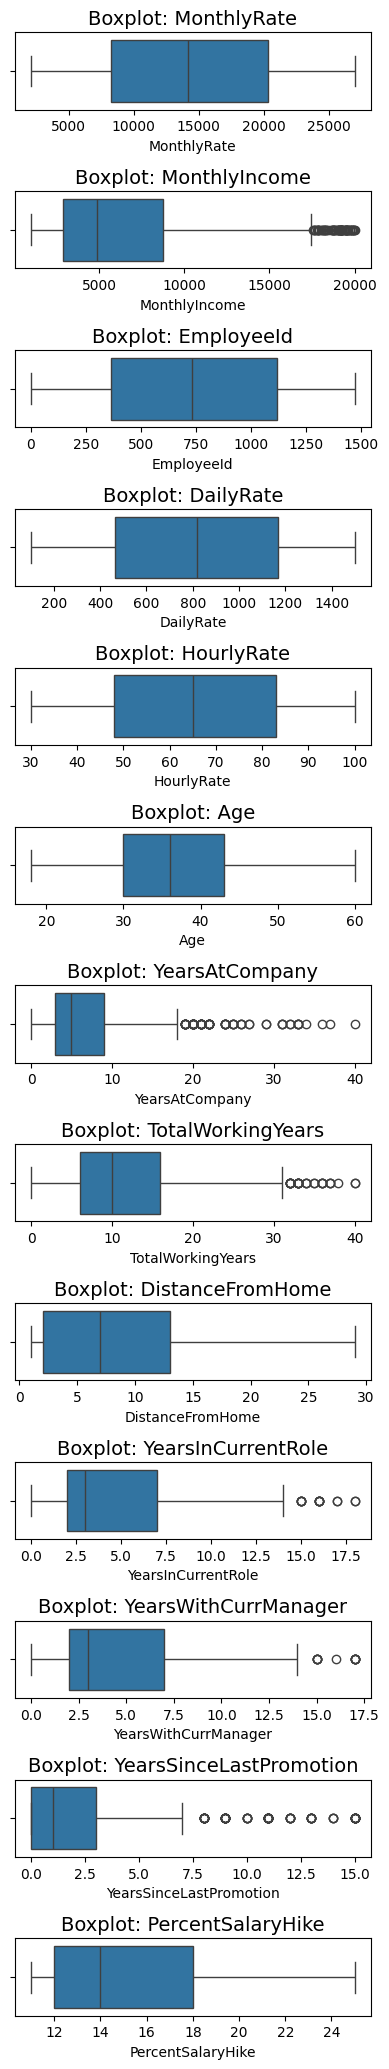

In [116]:
# Handle data range
numerical_cols = df.select_dtypes(include=['int64']).columns
range_df = df[numerical_cols].apply(lambda x: x.max() - x.min()).sort_values(ascending=False)
suspect_cols = range_df[range_df > 10].index.tolist()

plt.figure(figsize=(4, len(suspect_cols) * 1.6))

for i, col in enumerate(suspect_cols):
    plt.subplot(len(suspect_cols), 1, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}', fontsize=14)
plt.tight_layout()
plt.show()

- `MonthlyIncome`: Outlier pada bagian kanan, tetapi masih bisa dimaklumi untuk gaji level managerial.
- `TotalWorkingYears`, `YearsAtCompany`, `YearsSinceLastPromotion`, dll: Memiliki banyak outlier, tetapi masih logis untuk informasi employement.

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmployeeId                1058 non-null   int64   
 1   Age                       1058 non-null   int64   
 2   Attrition                 1058 non-null   int64   
 3   BusinessTravel            1058 non-null   category
 4   DailyRate                 1058 non-null   int64   
 5   Department                1058 non-null   category
 6   DistanceFromHome          1058 non-null   int64   
 7   Education                 1058 non-null   int64   
 8   EducationField            1058 non-null   category
 9   EnvironmentSatisfaction   1058 non-null   int64   
 10  Gender                    1058 non-null   category
 11  HourlyRate                1058 non-null   int64   
 12  JobInvolvement            1058 non-null   int64   
 13  JobLevel                  1058 non-null   int64   
 1

### Kesimpulan
- Jumlah data entri: 1058 baris data, tidak ada null
- Kolom bertipe kategori: `BusinessTravel`, `Department`, `EducationField`, `Gender`, `JobRole`, `MaritalStatus`, `OverTime`
- Kolom `Attrition` sudah bertipe int dan siap digunakan
- Tidak ada data outlier yang perlu diperbaiki

In [118]:
df.to_csv('employee_cleaned.csv', index=False)

## Exploratory Data Analysis (EDA)

### Perbandingan Attrition

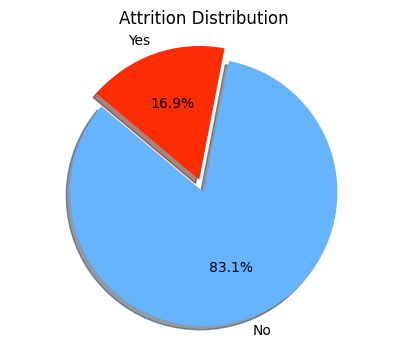

In [119]:
attrition_counts = df['Attrition'].value_counts()
labels = ['No', 'Yes']
colors = ['#66b3ff', '#fc2c03']
explode = (0, 0.1)

plt.figure(figsize=(5,4))
plt.pie(attrition_counts, labels=labels, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=explode, shadow=True)
plt.title('Attrition Distribution')
plt.axis('equal')
plt.show()

Attrition rate perusahaan Jaya Jaya Maju mencapai **16.9%**. (Benar pernyataan bahwa perusahaan Jaya Jaya Maju memiliki attrition rate tinggi (>10%))

### Attrition Berdasarkan Gender

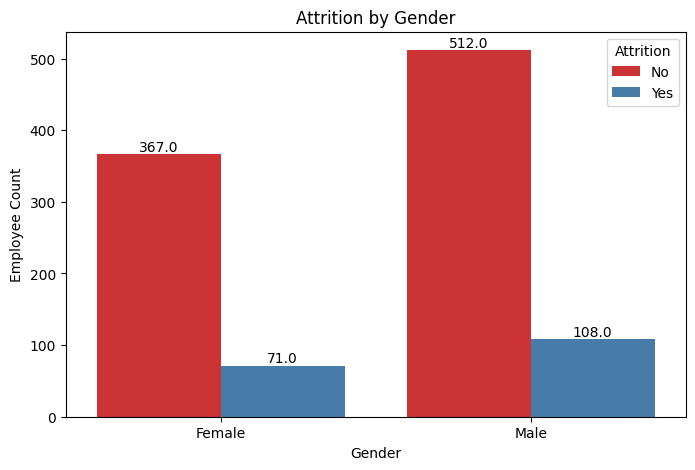

In [120]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='Gender', hue='Attrition', palette='Set1')
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Employee Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width()/2., height),
                    ha='center', va='bottom')
plt.show()

In [121]:
gender_attrition_counts = df.groupby(['Gender', 'Attrition']).size().unstack()
gender_totals = gender_attrition_counts.sum(axis=1)
attrition_rate_by_gender = (gender_attrition_counts[1] / gender_totals) * 100
print("Attrition Rate Based on Gender (%):")
print(attrition_rate_by_gender.round(2))

Attrition Rate Based on Gender (%):
Gender
Female    16.21
Male      17.42
dtype: float64


- Meskipun jumlah pria lebih banyak di perusahaan ini, tingkat attrition laki-laki sedikit lebih tinggi dibanding perempuan.
- Karyawan pria cenderung lebih berisiko resign dibanding perempuan.

### Attrition Berdasarkan Job Role

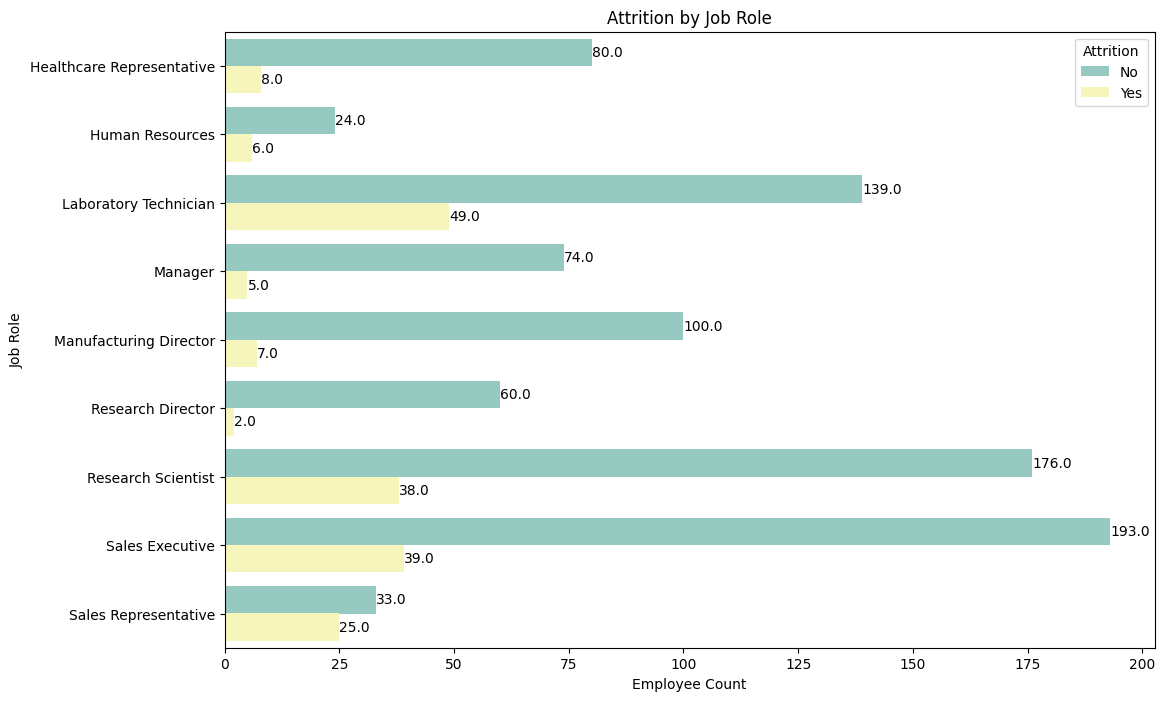

In [122]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df, y='JobRole', hue='Attrition', palette='Set3')
plt.title('Attrition by Job Role')
plt.xlabel('Employee Count')
plt.ylabel('Job Role')
plt.legend(title='Attrition', labels=['No', 'Yes'])
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.annotate(f'{width}', (width, p.get_y() + p.get_height()/2),
                    ha='left', va='center')
plt.show()

Job Role dengan Jumlah Attrition Tertinggi:
- Laboratory Technician: 49 orang resign
- Sales Executive: 39 orang resign
- Research Scientist: 38 orang resign

Job Role dengan Attrition Terendah:
- Research Director: hanya 2 orang resign
- Manager: 5 orang resign
- Manufacturing Director: 7 orang resign

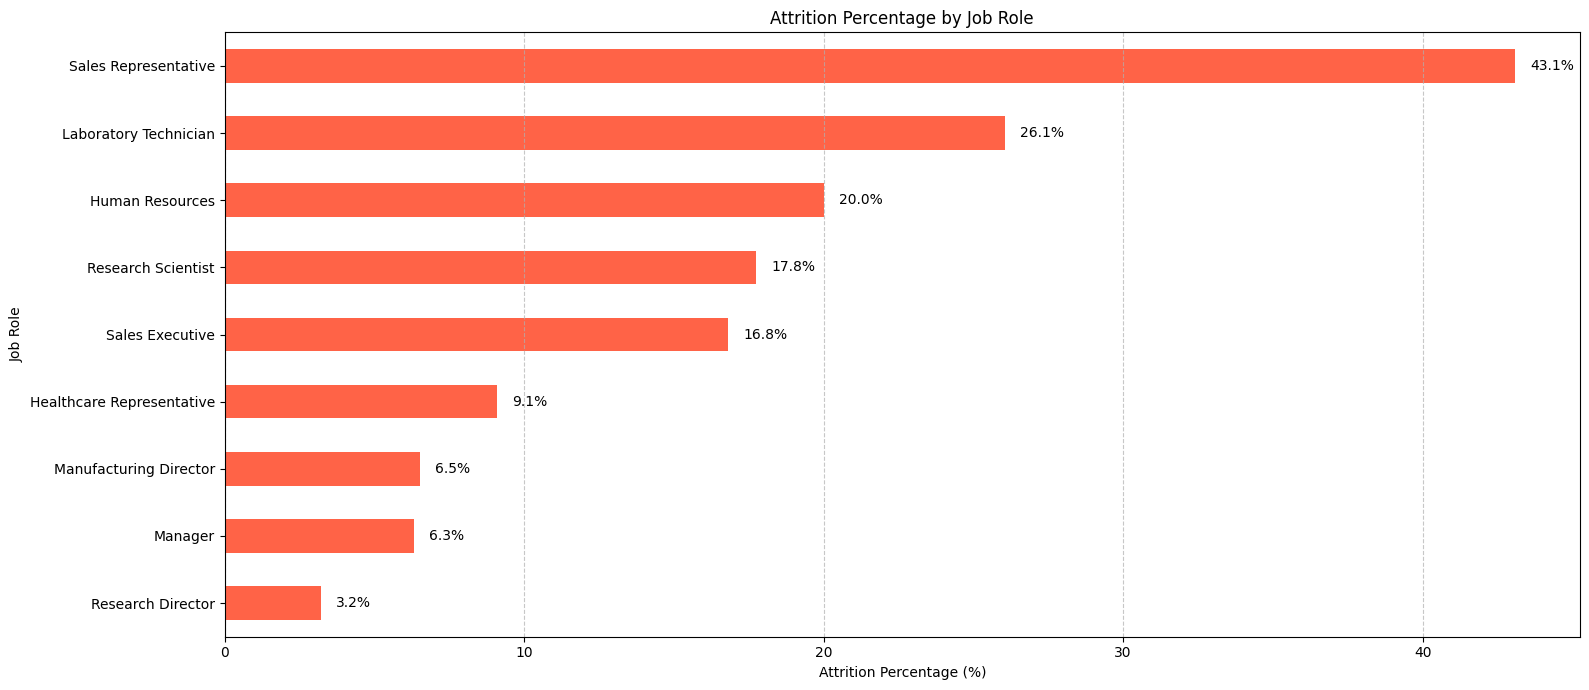

In [123]:
jobrole_attrition_counts = df.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)
jobrole_totals = jobrole_attrition_counts.sum(axis=1)
attrition_rate_by_jobrole = (jobrole_attrition_counts[1] / jobrole_totals) * 100
attrition_rate_by_jobrole = attrition_rate_by_jobrole.sort_values(ascending=False).round(2)

plt.figure(figsize=(16, 7))
attrition_rate_by_jobrole.sort_values().plot(kind='barh', color='tomato')
plt.xlabel('Attrition Percentage (%)')
plt.ylabel('Job Role')
plt.title('Attrition Percentage by Job Role')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
for index, value in enumerate(attrition_rate_by_jobrole.sort_values()):
    plt.text(value + 0.5, index, f'{value:.1f}%', va='center')
plt.show()

Dapat dilihat bahwa pekerjaan di bidang teknis, human resources, dan sales memiliki tingkat turnover yang cukup tinggi, sedangkan pada level managerial cenderung memiliki attrition tingkat rendah.

#### Attrition Berdasarkan OverTime

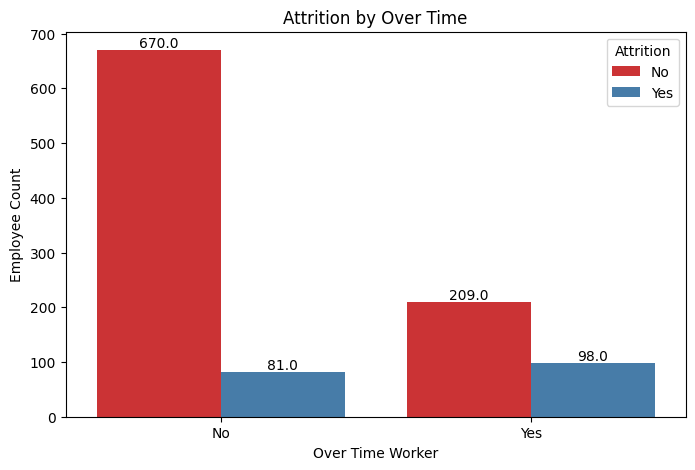

In [124]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='OverTime', hue='Attrition', palette='Set1')
plt.title('Attrition by Over Time')
plt.xlabel('Over Time Worker')
plt.ylabel('Employee Count')
plt.legend(title='Attrition', labels=['No', 'Yes'])
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width()/2., height),
                    ha='center', va='bottom')
plt.show()

- Persentase Karyawan yang mengalami Attrition dan Over Time sebanyak 31.9%, sedangkan yang Attrition tanpa Over Time sebanyak 10.8%.
- Bekerja lembur secara signifikan terkait dengan tingkat keluar yang lebih tinggi.
- Karyawan yang bekerja lembur tiga kali lebih mungkin resign dibanding yang tidak lembur.

Hal ini bisa mengindikasikan:

- Beban kerja berlebih mungkin menyebabkan stres/fatigue.
- Over Time dapat memengaruhi Work Life Balance yang menurun.
- Potensi ketidakpuasan terhadap sistem manajemen waktu atau kompensasi lembur.

Untuk mengetahui faktor-faktor yang paling berpengaruh terhadap keputusan karyawan untuk melakukan resign, analisis akan difokuskan pada persentase attrition di setiap kategori atribut. Pendekatan ini memberikan gambaran yang lebih akurat mengenai seberapa besar kemungkinan seseorang dari kategori tertentu akan resign.

### Attrition Berdasarkan Age Group

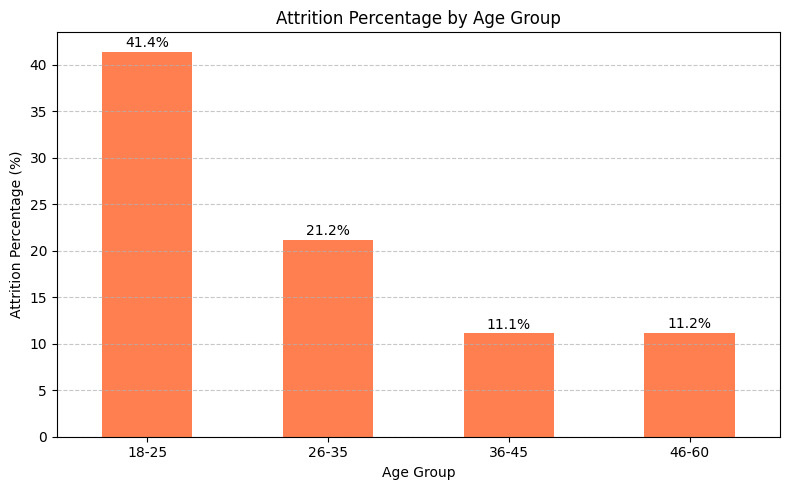

In [125]:
bins = [18, 25, 35, 45, 60]
labels = ['18-25', '26-35', '36-45', '46-60']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
attrition_rate_by_age = df.groupby('AgeGroup')['Attrition'].mean() * 100
plt.figure(figsize=(8, 5))
attrition_rate_by_age.plot(kind='bar', color='coral')
plt.ylabel('Attrition Percentage (%)')
plt.xlabel('Age Group')
plt.title('Attrition Percentage by Age Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(attrition_rate_by_age):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Karyawan muda (terutama usia < 26 tahun) memiliki kemungkinan jauh lebih tinggi untuk keluar dari perusahaan.

### Attrition Berdasarkan Beberapa Faktor per Kategori

**Kategori Job/Working Experience**

`JobLevel`, `JobInvolvement`, `JobSatisfaction`, `TotalWorkingYears`, `YearsAtCompany`, `YearsInCurrentRole`, `YearsSinceLastPromotion`, `YearsWithCurrManager`

**Kategori Salary/Income**

`DailyRate`, `HourlyRate`, `MonthlyIncome`, `MonthlyRate`, `PercentSalaryHike`, `StockOptionLevel`

**Kategori Personal Life**

`EnvironmentSatisfaction`, `WorkLifeBalance`, `RelationshipSatisfaction`, `Education`, `MaritalStatus`, `NumCompaniesWorked`, `TrainingTimesLastYear`, `DistanceFromHome`

In [126]:
# Label mapping dictionary
label_mappings = {
    'Education': {
        1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'
    },
    'EnvironmentSatisfaction': {
        1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'
    },
    'JobInvolvement': {
        1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'
    },
    'JobSatisfaction': {
        1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'
    },
    'PerformanceRating': {
        1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'
    },
    'RelationshipSatisfaction': {
        1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'
    },
    'WorkLifeBalance': {
        1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'
    },
    'JobLevel': {
        1: 'Level 1', 2: 'Level 2', 3: 'Level 3', 4: 'Level 4', 5: 'Level 5'
    }
}

In [127]:
def plot_attrition(column, title):
    temp_df = df.copy()
    if column == 'TotalWorkingYears':
        bins = [0, 3, 6, 10, 20, 40]
        labels = ['<3', '3-6', '6-10', '10-20', '20+']
        temp_df['group'] = pd.cut(temp_df[column], bins=bins, labels=labels, include_lowest=True)
    elif column == 'YearsAtCompany':
        bins = [0, 2, 5, 10, 20, 40]
        labels = ['<2', '2-5', '5-10', '10-20', '20+']
        temp_df['group'] = pd.cut(temp_df[column], bins=bins, labels=labels, include_lowest=True)
    elif column == 'YearsInCurrentRole':
        bins = [0, 2, 5, 10, 20]
        labels = ['<2', '2-5', '5-10', '10+']
        temp_df['group'] = pd.cut(temp_df[column], bins=bins, labels=labels, include_lowest=True)
    elif column == 'YearsSinceLastPromotion':
        bins = [0, 1, 3, 5, 10, 20]
        labels = ['<1', '1-3', '3-5', '5-10', '10+']
        temp_df['group'] = pd.cut(temp_df[column], bins=bins, labels=labels, include_lowest=True)
    elif column == 'YearsWithCurrManager':
        bins = [0, 2, 5, 10, 20]
        labels = ['<2', '2-5', '5-10', '10+']
        temp_df['group'] = pd.cut(temp_df[column], bins=bins, labels=labels, include_lowest=True)
    elif column in label_mappings:
        mapping = label_mappings[column]
        temp_df['group'] = temp_df[column].map(mapping)
        ordered_labels = [mapping[k] for k in sorted(mapping.keys())]
        temp_df['group'] = pd.Categorical(temp_df['group'], categories=ordered_labels, ordered=True)
    elif column in label_mappings:
        mapping = label_mappings[column]
        temp_df['group'] = temp_df[column].map(mapping)
        ordered_labels = [mapping[k] for k in sorted(mapping.keys())]
        temp_df['group'] = pd.Categorical(temp_df['group'], categories=ordered_labels, ordered=True)
    else:
        temp_df['group'] = temp_df[column]
        if column in df.columns and pd.api.types.is_categorical_dtype(df[column]):
            temp_df['group'] = pd.Categorical(df[column], categories=df[column].cat.categories, ordered=True)

    attrition_rate = temp_df.groupby('group')['Attrition'].mean() * 100
    attrition_rate_sorted = attrition_rate.sort_index()

    plt.figure(figsize=(17, 5))
    plt.barh(attrition_rate_sorted.index.astype(str), attrition_rate_sorted.values, color='skyblue')
    plt.xlabel('Attrition Percentage (%)')
    plt.title(f'Attrition Percentage by {title}')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    for i, v in enumerate(attrition_rate_sorted):
        plt.text(v + 0.5, i, f'{v:.1f}%', va='center')
    plt.tight_layout()
    plt.show()

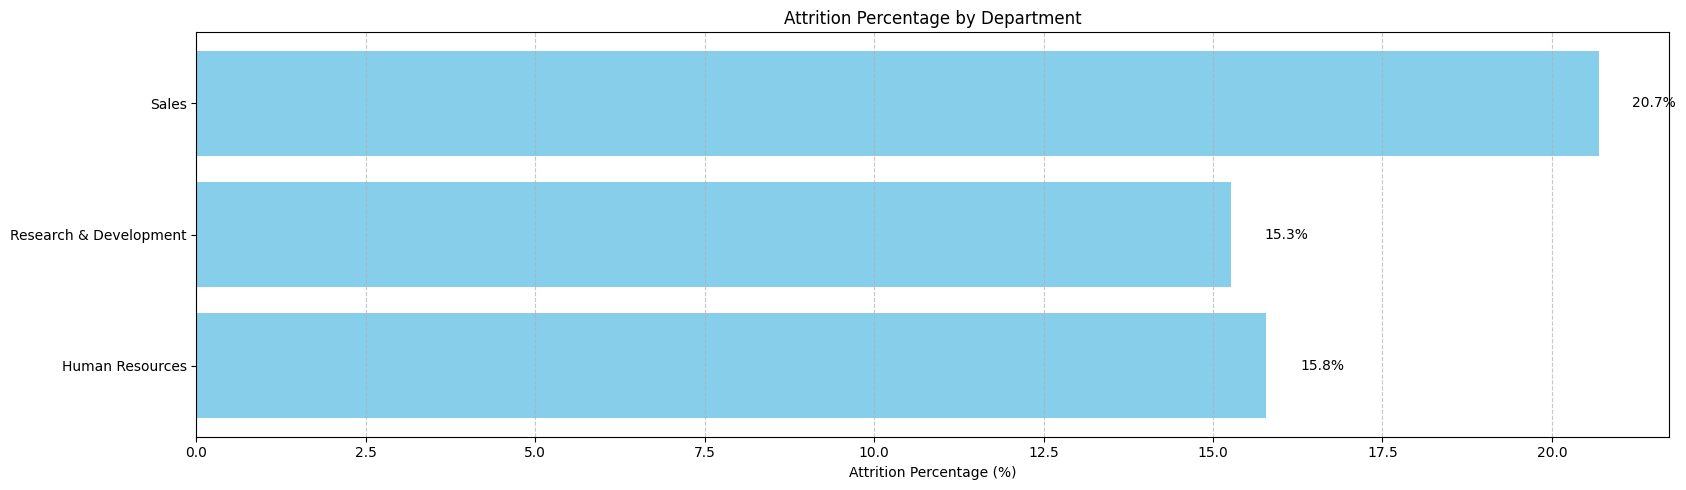

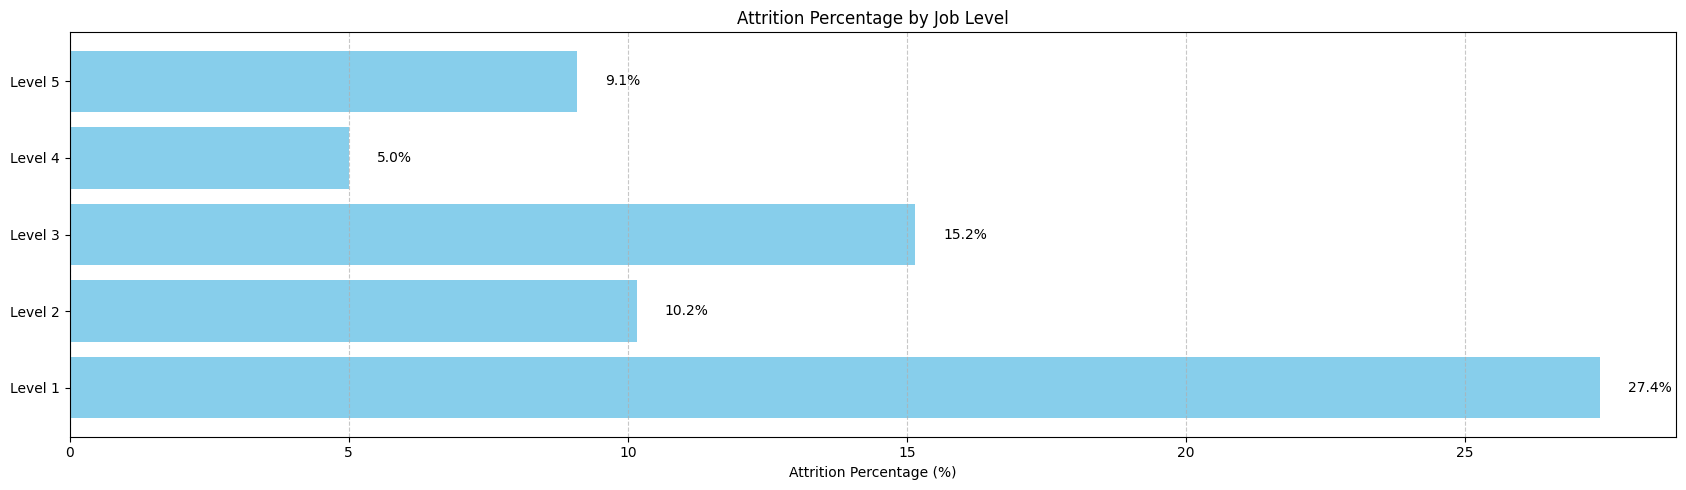

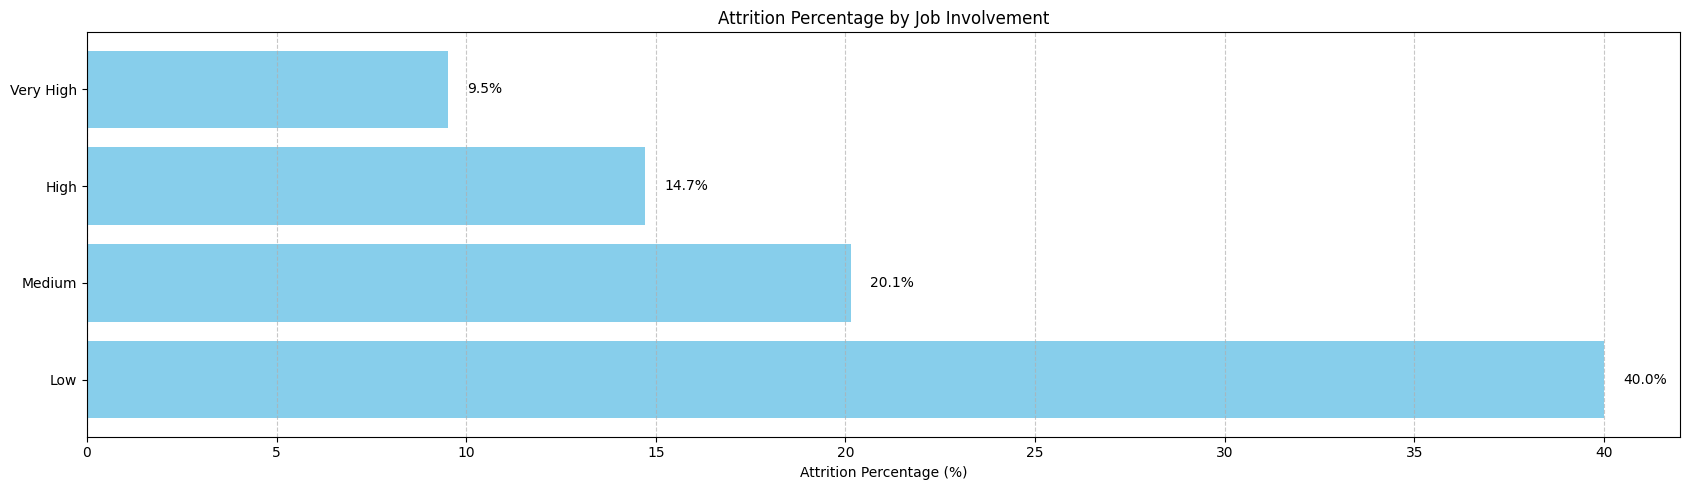

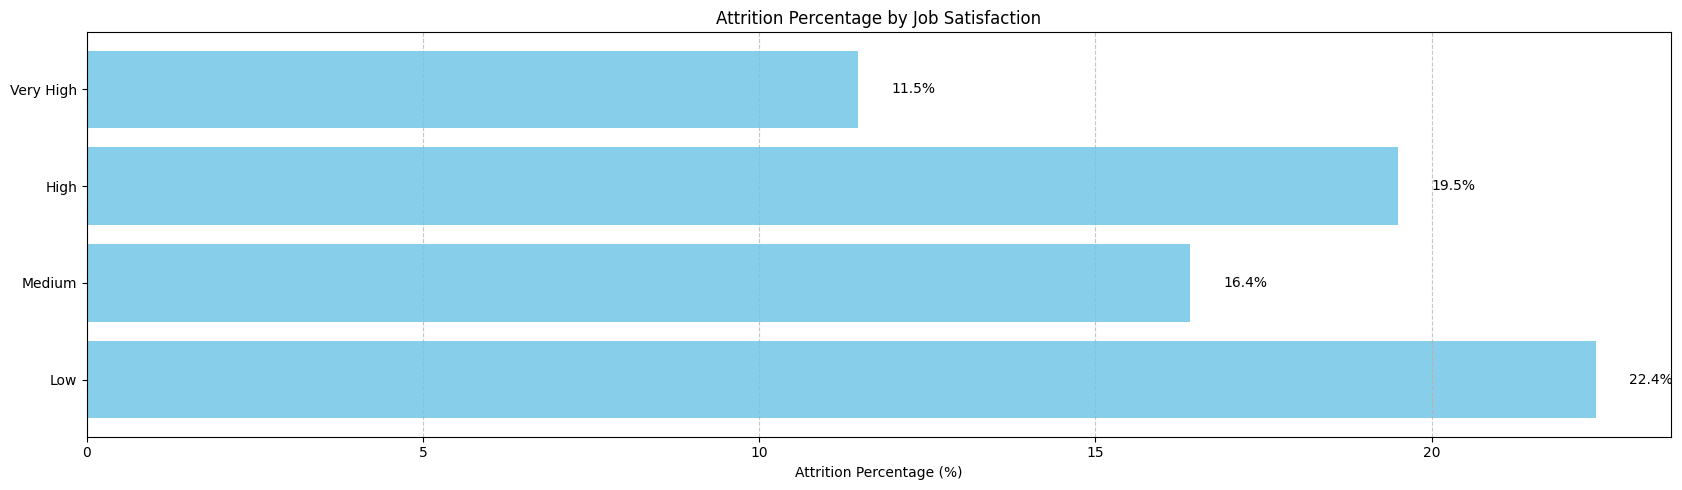

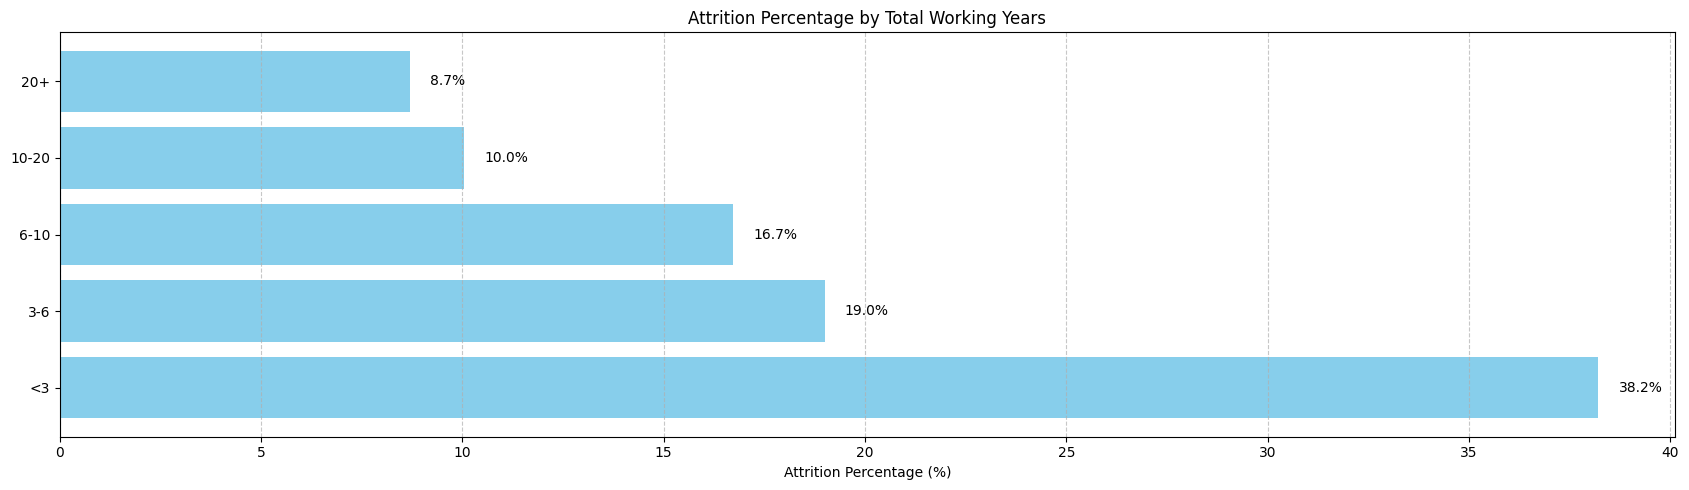

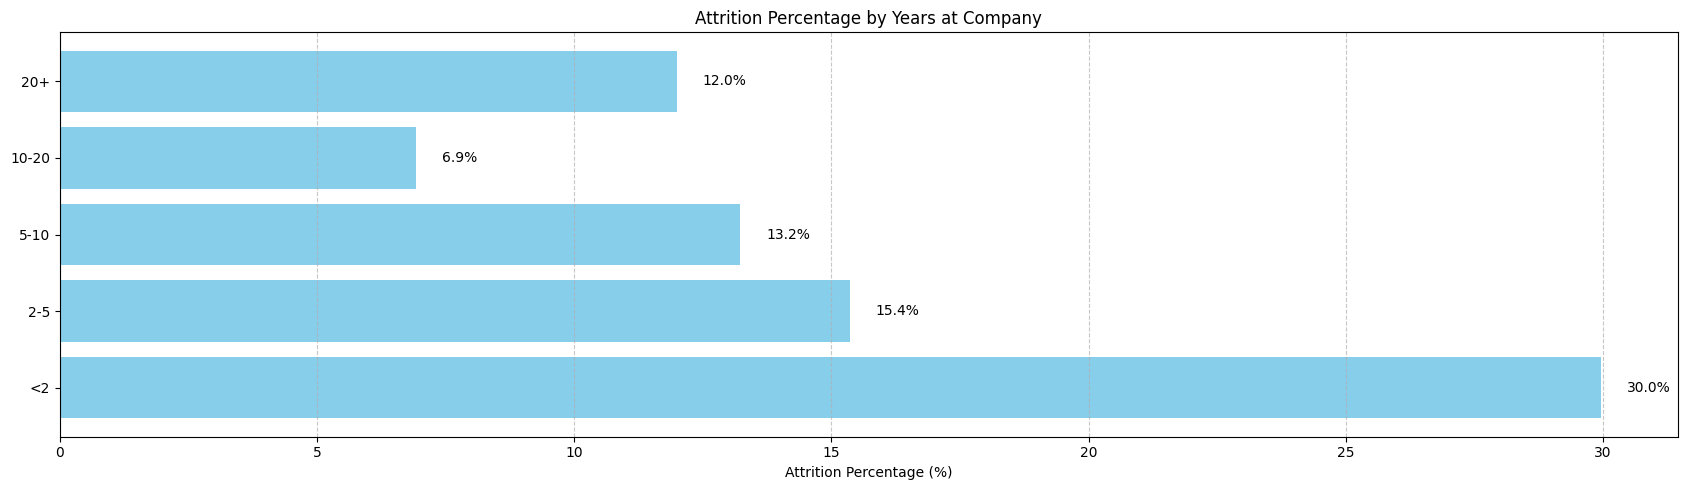

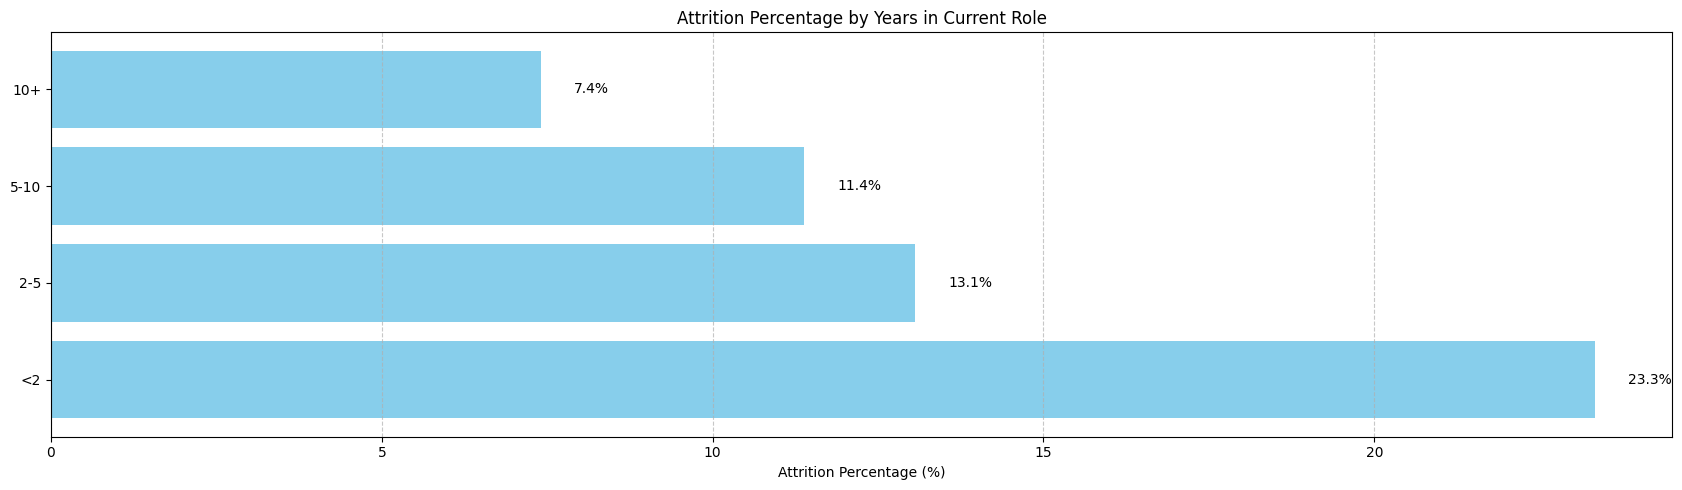

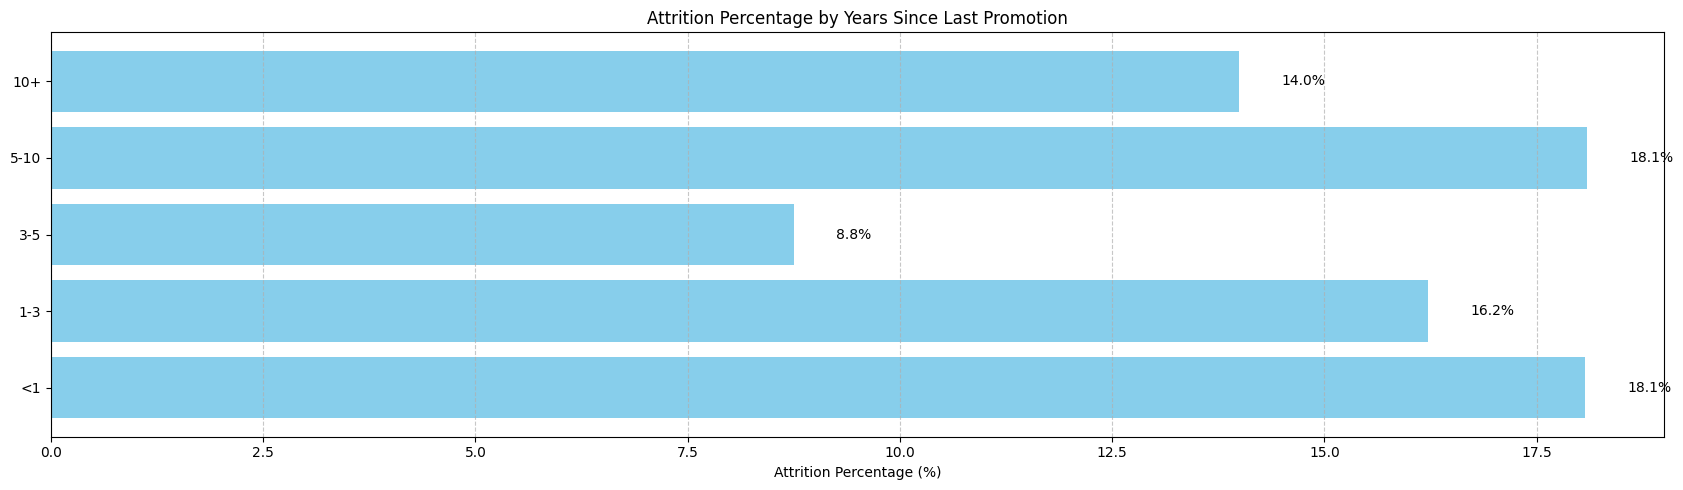

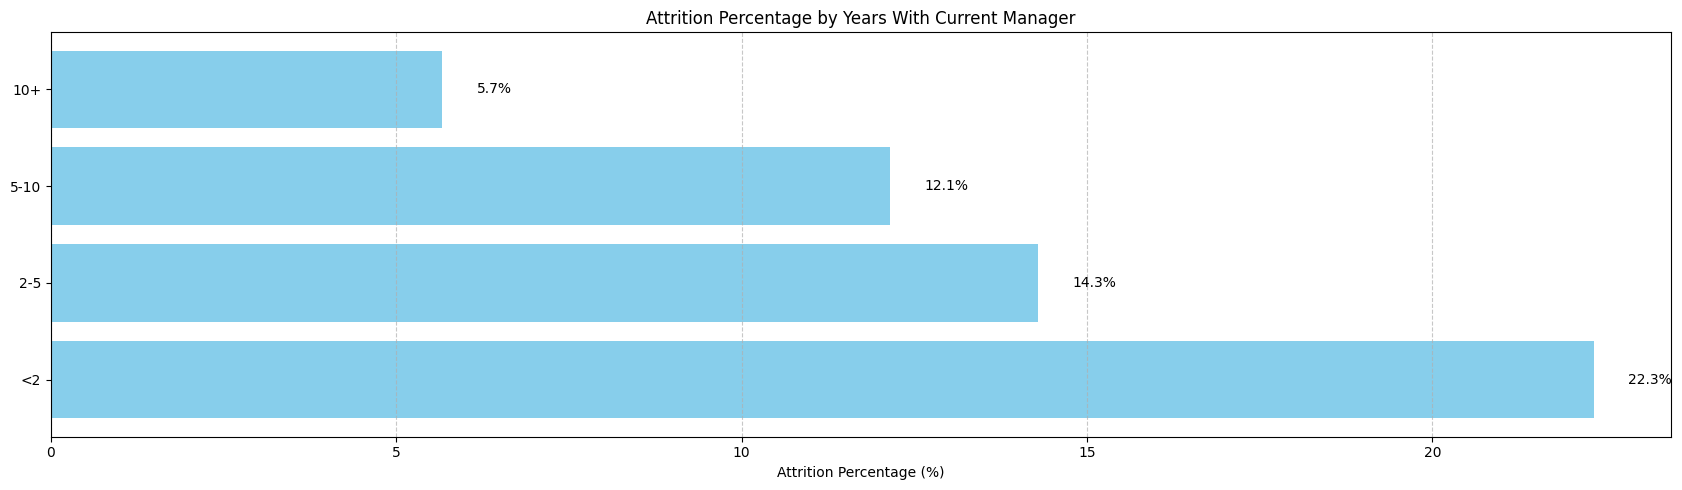

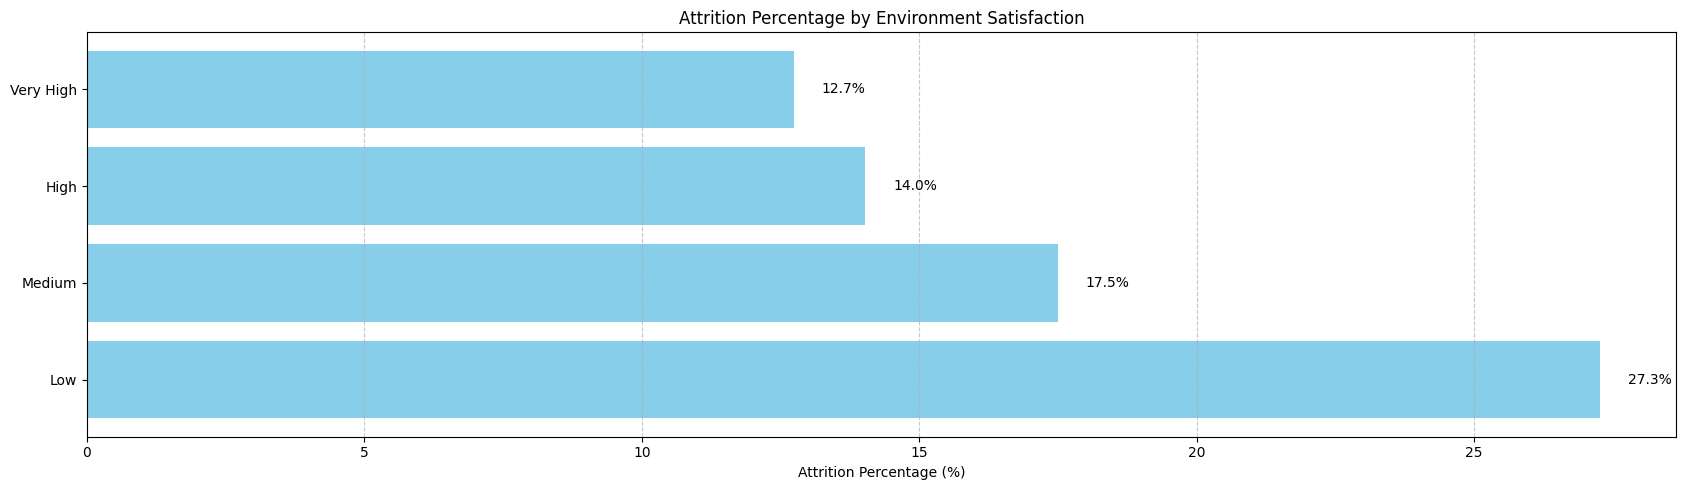

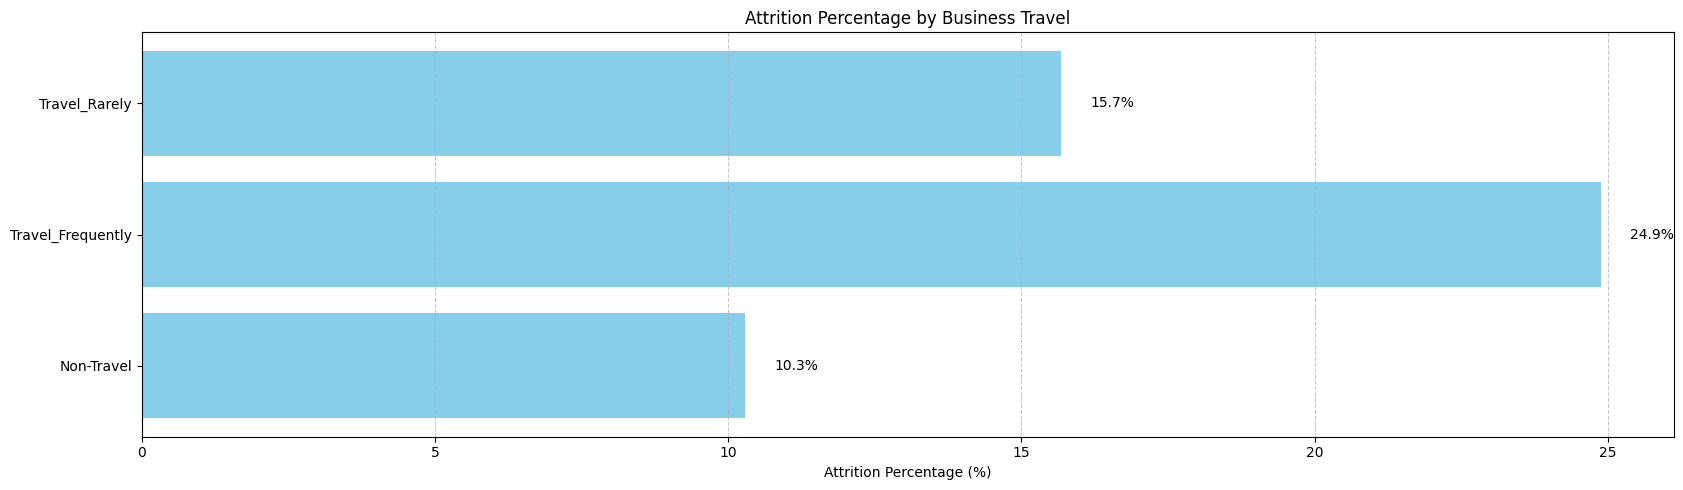

In [128]:
# Job/Working Experience
job_features = [
    ('Department', 'Department'),
    ('JobLevel', 'Job Level'),
    ('JobInvolvement', 'Job Involvement'),
    ('JobSatisfaction', 'Job Satisfaction'),
    ('TotalWorkingYears', 'Total Working Years'),
    ('YearsAtCompany', 'Years at Company'),
    ('YearsInCurrentRole', 'Years in Current Role'),
    ('YearsSinceLastPromotion', 'Years Since Last Promotion'),
    ('YearsWithCurrManager', 'Years With Current Manager'),
    ('EnvironmentSatisfaction', 'Environment Satisfaction'),
    ('BusinessTravel', 'Business Travel'),
]

for col, title in job_features:
    plot_attrition(col, title)

- Divisi **Sales** memiliki tingkat attrition tertinggi yaitu 20.7%, diikuti oleh Research & Development dan Human Resources masing-masing sekitar 15%.
- Karyawan pada **Job Level 1 paling banyak yang mengundurkan diri**. Sementara itu, pada Job Level 4 dan 5, angka attrition cenderung rendah, kemungkinan karena kenyamanan dan kestabilan yang dirasakan di level atas.
- Karyawan dengan tingkat **Job Involvement rendah memiliki tingkat attrition sangat tinggi yaitu 40%**, menunjukkan keterlibatan kerja yang rendah menjadi indikator kuat keputusan resign.
- Karyawan dengan kepuasan kerja **(Job Satisfaction) rendah memiliki tingkat resign tertinggi** yaitu 22.4%, dibandingkan dengan tingkat kepuasan lainnya.
- Karyawan dengan total pengalaman kerja kurang dari 3 tahun memiliki tingkat attrition sebesar 38.2%, menandakan karyawan **di awal karier cenderung lebih mudah keluar**.
- Sekitar 30% karyawan yang bekerja di perusahaan ini kurang dari 2 tahun memutuskan untuk resign, mengindikasikan **tantangan dalam retensi karyawan baru**.
- Sebanyak 23.3% karyawan yang berada di posisi saat ini kurang dari 2 tahun memilih keluar, menunjukkan kemungkinan ketidakcocokan dengan peran atau harapan yang tidak terpenuhi.
- Tingkat attrition berdasarkan **durasi sejak promosi terakhir relatif merata**, dengan yang paling tinggi pada kategori < 1 tahun dan 5-10 tahun (masing-masing 18.1%).
- Karyawan yang bekerja dengan manajer saat ini kurang dari 2 tahun memiliki tingkat attrition tertinggi yaitu 22.3%, menunjukkan pentingnya relasi awal dengan atasan.
- Karyawan dengan kepuasan lingkungan kerja rendah **(Environment Satisfaction) memiliki tingkat attrition** sebesar 27.3%, menyoroti pentingnya suasana kerja yang positif.
- Karyawan yang s**ering bepergian untuk dinas memiliki tingkat attrition tertinggi** sebesar 24.9%, disusul oleh yang kadang bepergian sebesar 15.7%.

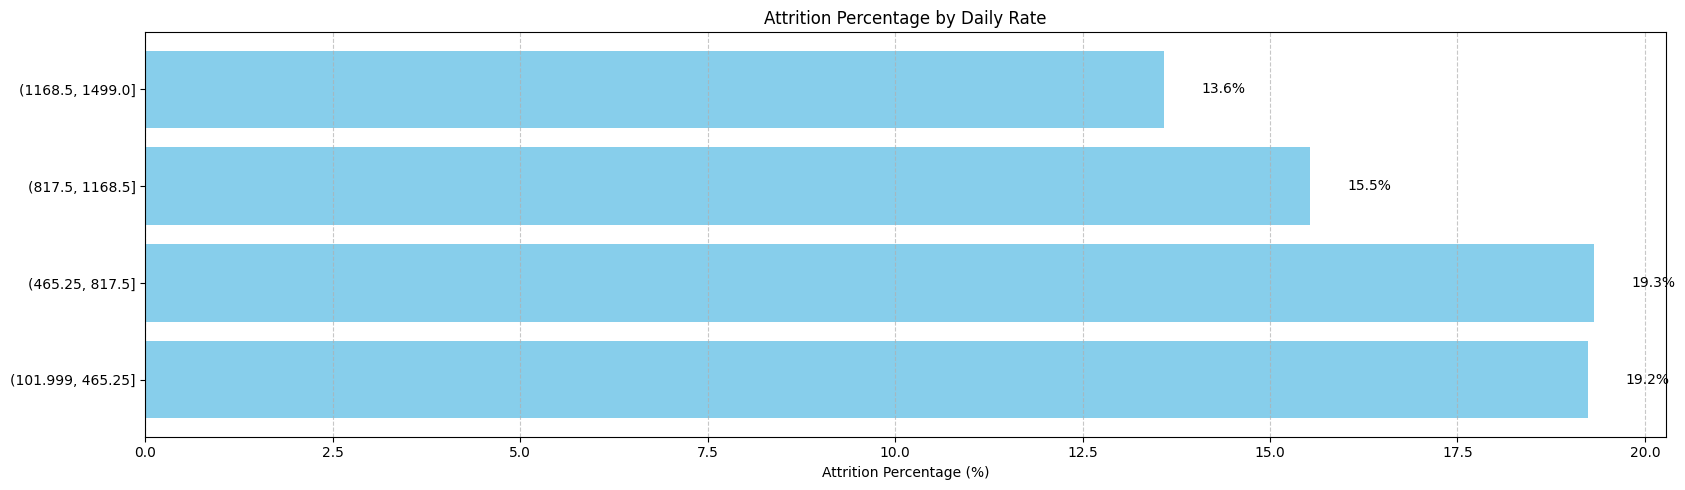

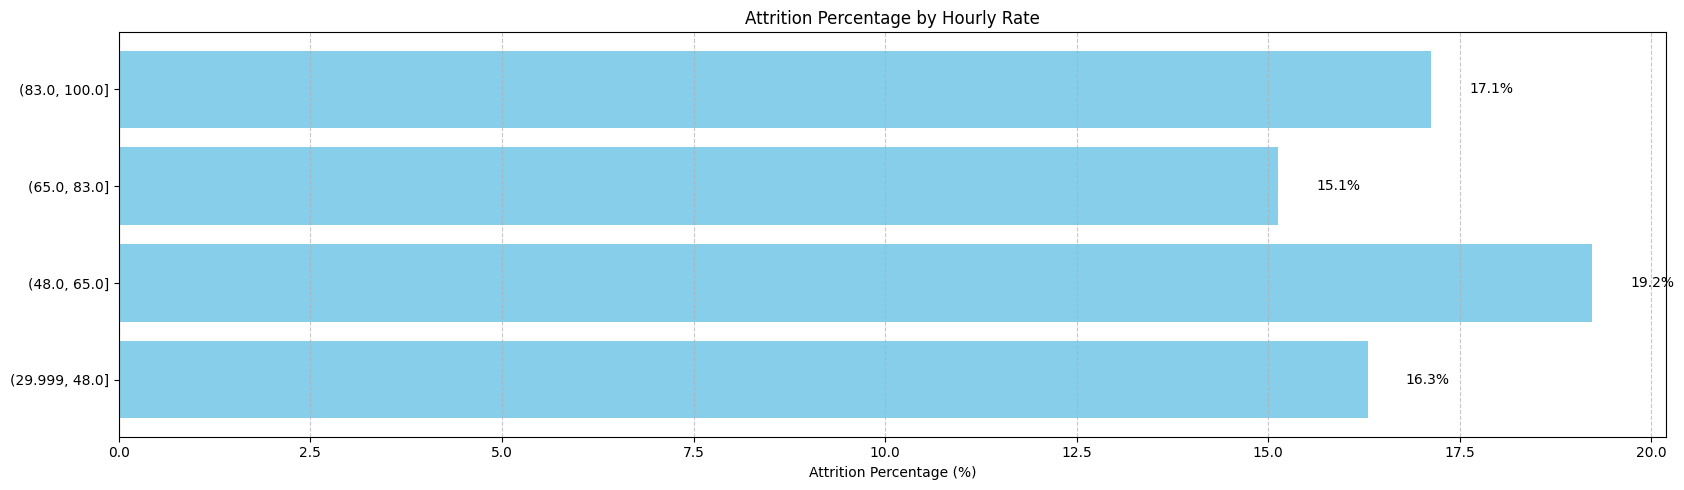

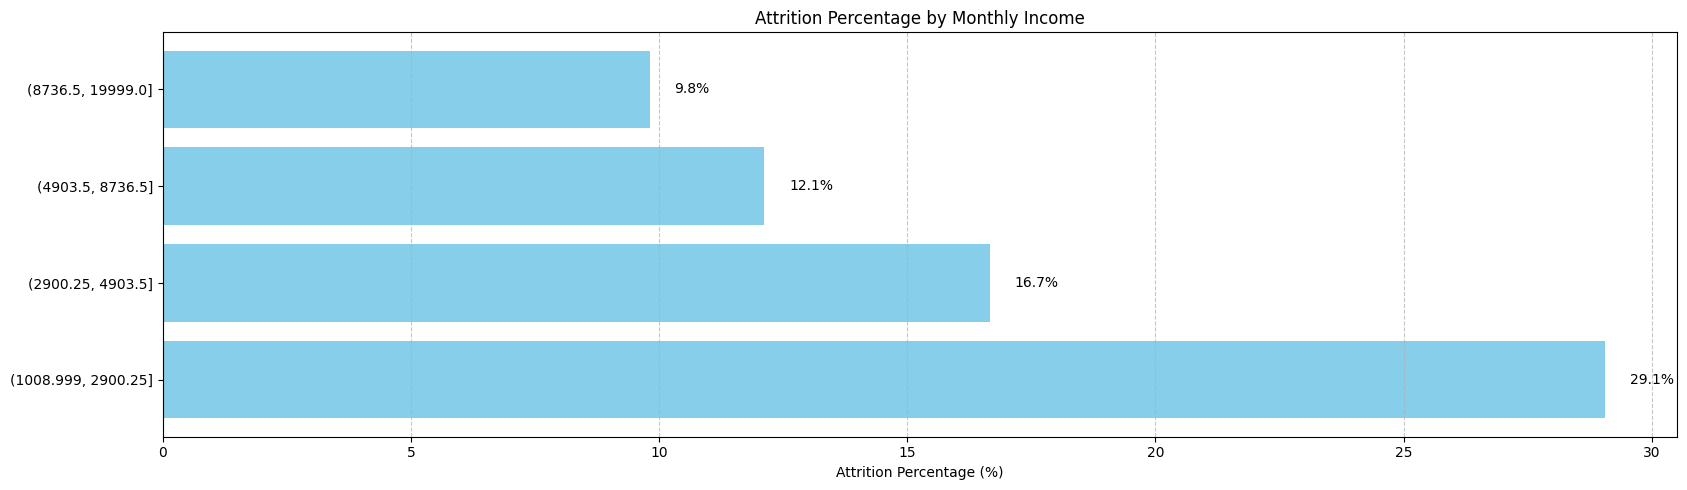

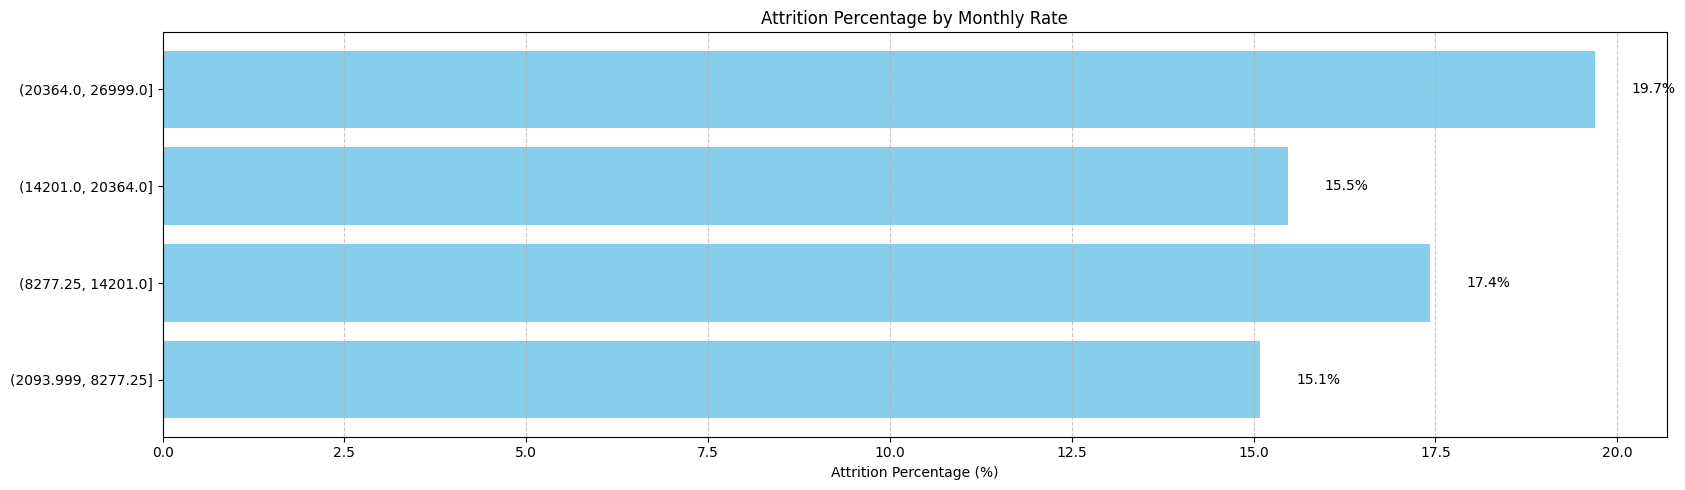

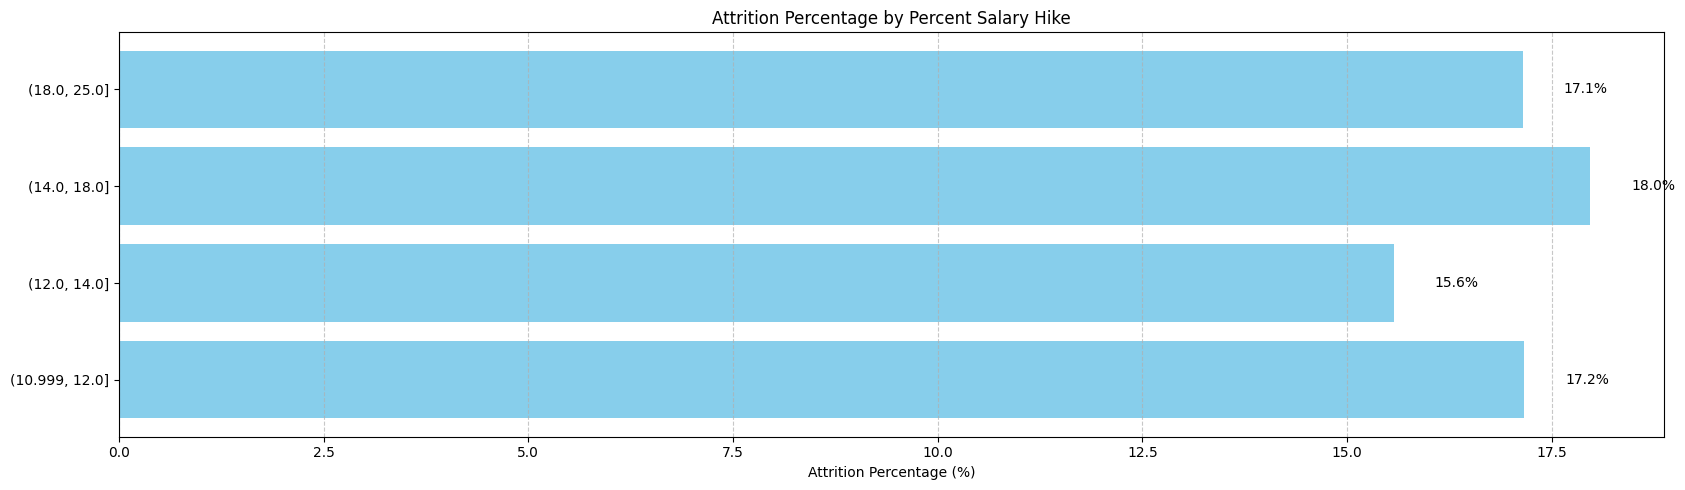

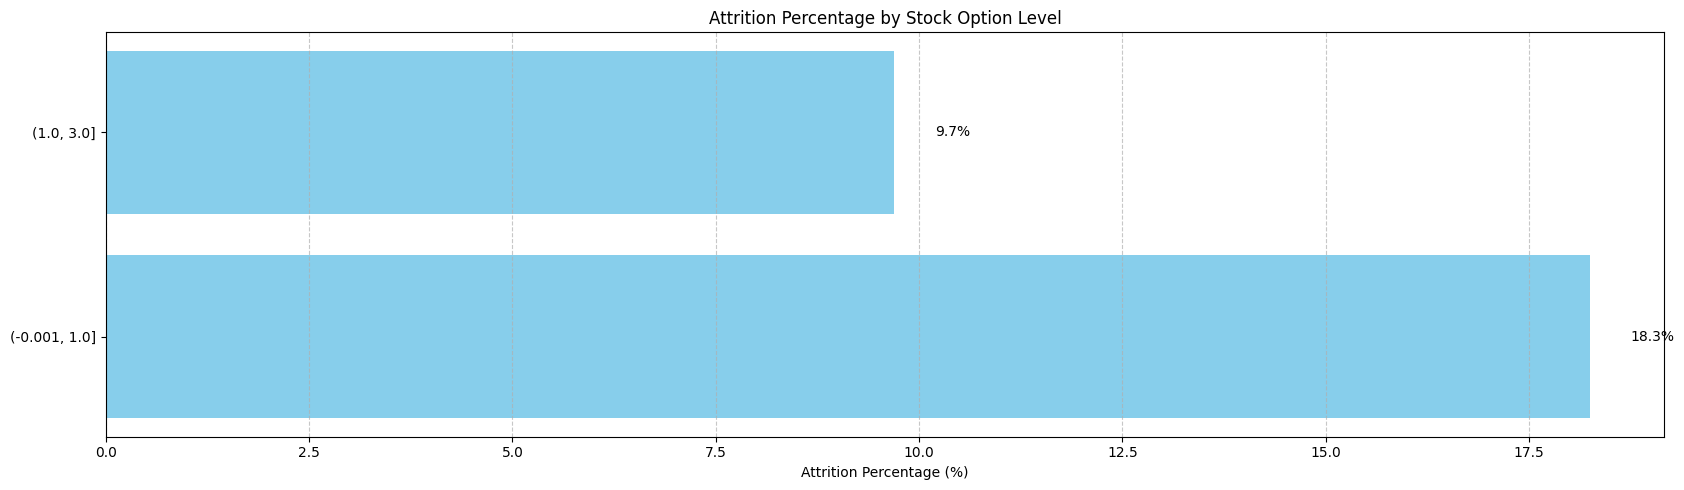

In [129]:
# Salary/Income
salary_features = [
    ('DailyRate', 'Daily Rate'),
    ('HourlyRate', 'Hourly Rate'),
    ('MonthlyIncome', 'Monthly Income'),
    ('MonthlyRate', 'Monthly Rate'),
    ('PercentSalaryHike', 'Percent Salary Hike'),
    ('StockOptionLevel', 'Stock Option Level')
]

for col, title in salary_features:
    df[f'{col}_bin'] = pd.qcut(df[col], q=4, duplicates='drop')
    plot_attrition(f'{col}_bin', title)

- Daily Rate yang rendah (rentang 101–818) menunjukkan tingkat pengunduran diri tertinggi, yakni sebesar 19,2%. Dibandingkan dengan rentang 817–1168 (15,5%) dan 1168–1499 (13,6%), tren ini menunjukkan bahwa s**emakin rendah kompensasi harian yang diterima karyawan, semakin besar kemungkinan mereka untuk memilih resign**.
- Pada aspek Hourly Rate, tingkat attrition tertinggi terdapat pada kelompok dengan kompensasi menengah, yakni rentang 48–65 jam kerja, sebesar 19,2%. Disusul oleh kelompok dengan rate rendah 29–48 sebesar 16,3%, dan 83–100 sebesar 17,1%. Kelompok tertinggi (65–83) justru memiliki attrition lebih rendah (15,1%). Hal ini menunjukkan bahwa pengaruh **hourly rate terhadap attrition bersifat tidak linear** dan kemungkinan dipengaruhi oleh faktor lain seperti beban kerja atau jenis pekerjaan.
- Berdasarkan Monthly Income, terdapat pola yang cukup jelas: **semakin tinggi pendapatan bulanan, semakin rendah tingkat pengunduran diri**. Karyawan dengan pendapatan rendah (1008–2900) memiliki tingkat attrition paling tinggi, yaitu 29,1%, diikuti oleh kelompok 2900–4903 sebesar 16,7%, 4903–8736 sebesar 12,1%, dan 8736–19999 sebesar 9,8%. Hal ini mengindikasikan bahwa pendapatan bulanan yang lebih tinggi berkontribusi pada peningkatan kepuasan dan retensi karyawan di perusahaan Maju Maju Jaya.
- Untuk Monthly Rate, data menunjukkan bahwa kelompok dengan rate tertinggi (20364–26999) justru memiliki tingkat attrition paling tinggi sebesar 19,7%. Diikuti oleh kelompok 8277–14201 sebesar 17,4%, 14201–20364 sebesar 15,5%, dan kelompok terendah (2093–8277) sebesar 15,1%. Temuan ini menunjukkan bahwa **tidak selalu kompensasi bulanan tinggi mengurangi attrition**, kemungkinan karena kelompok ini menghadapi tekanan kerja yang lebih tinggi.
- Pada Percent Salary Hike, karyawan dengan kenaikan gaji dalam rentang 14–18% memiliki tingkat attrition tertinggi yaitu 18%, diikuti oleh kelompok 10–12% (17,2%), 18–25% (17,1%), dan 12–14% (15,6%). Ini menunjukkan bahwa kenaikan gaji saja tidak cukup untuk mencegah attrition, jika tidak disertai faktor motivasional atau non-finansial lainnya.
- Berdasarkan Stock Option Level, kelompok dengan rentang -0.001–1 memiliki tingkat attrition lebih tinggi (18,3%) dibandingkan dengan kelompok 1–3 yang hanya sebesar 9,7%. Hal ini menandakan bahwa **kepemilikan saham (stock options) dalam jumlah lebih besar dapat meningkatkan loyalitas karyawan** terhadap perusahaan.

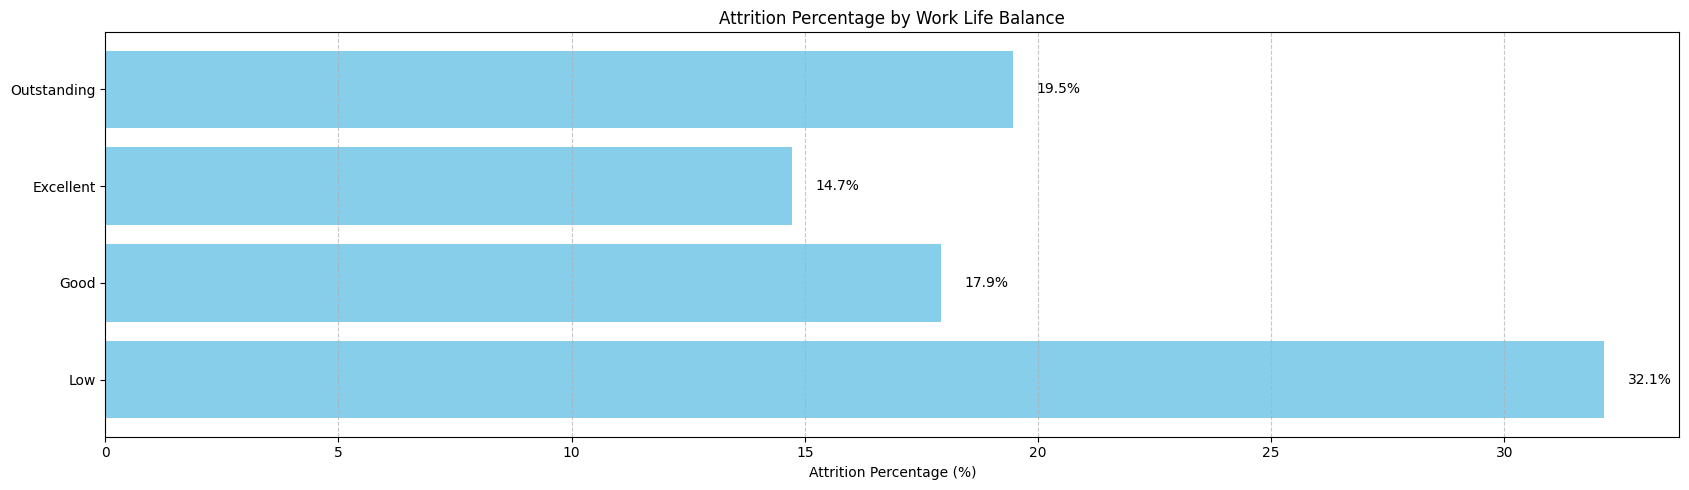

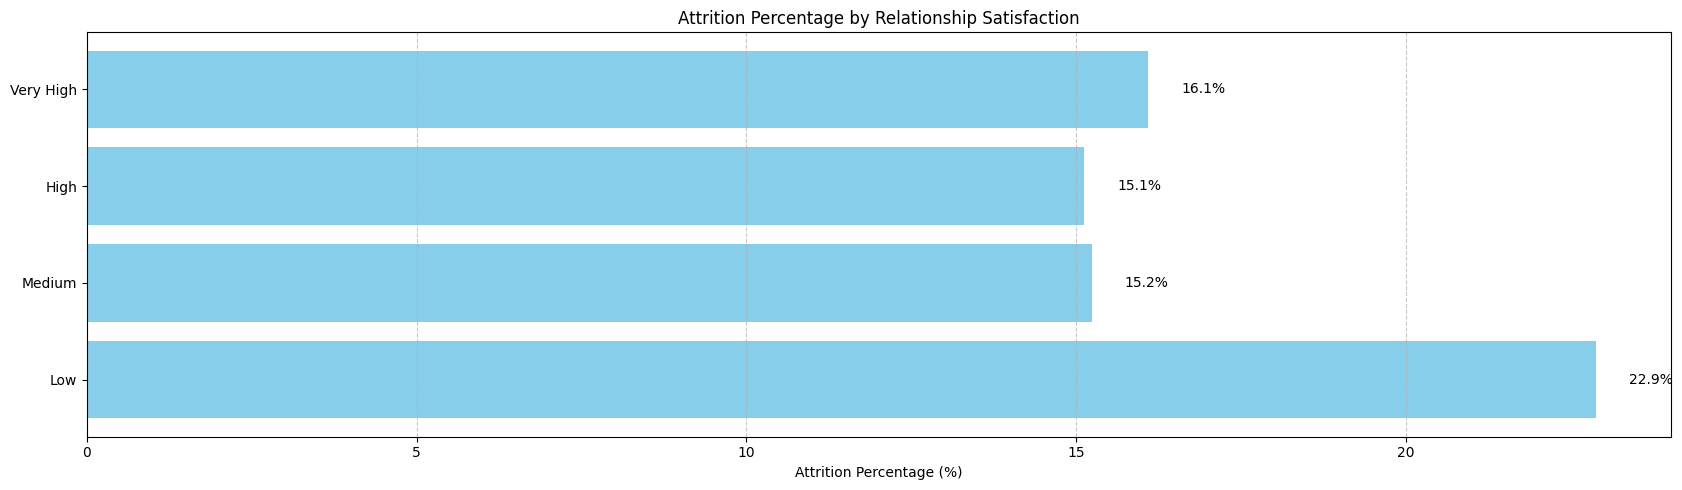

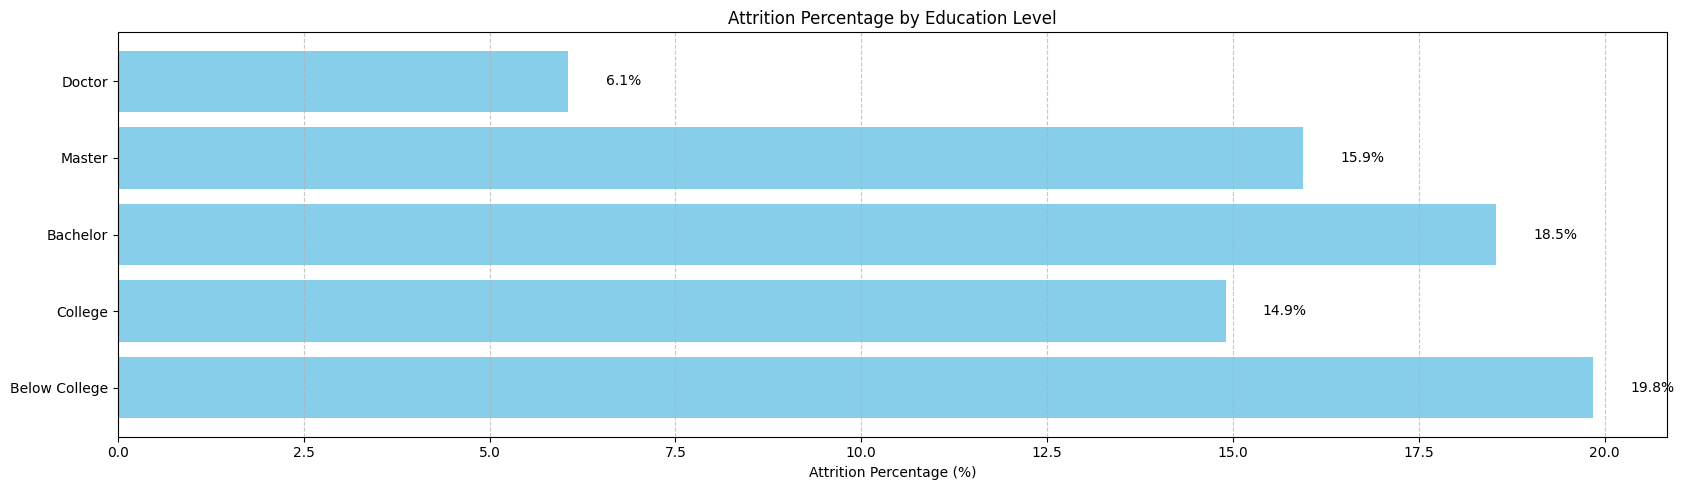

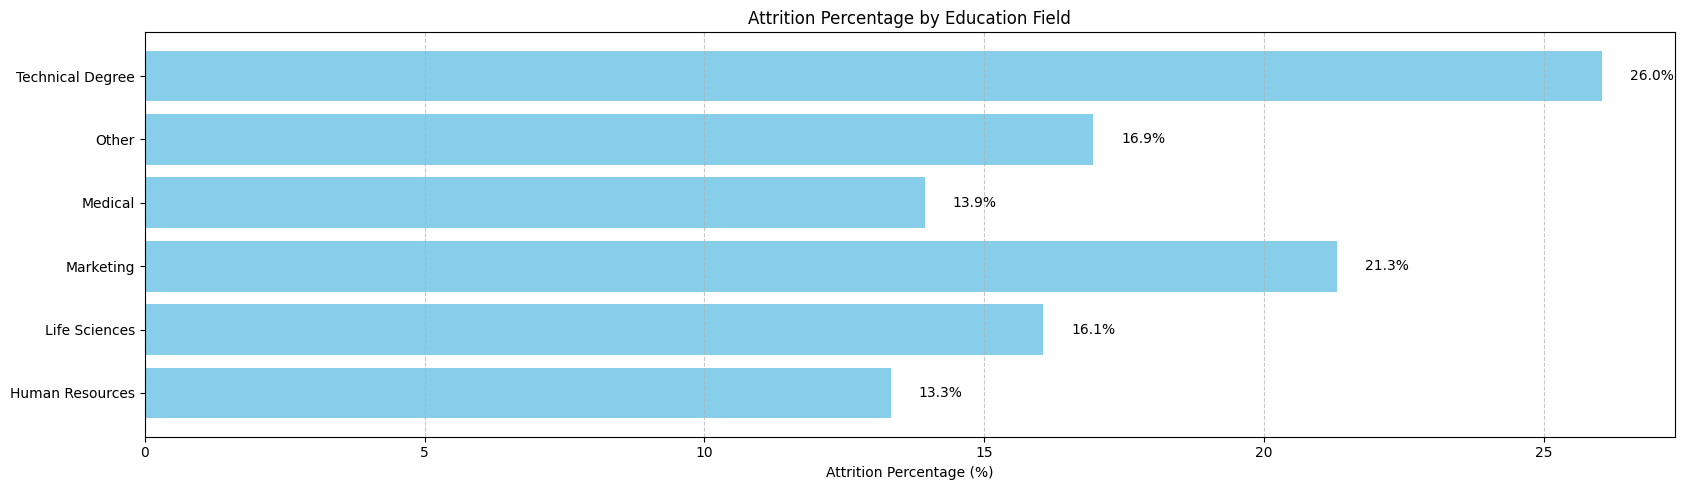

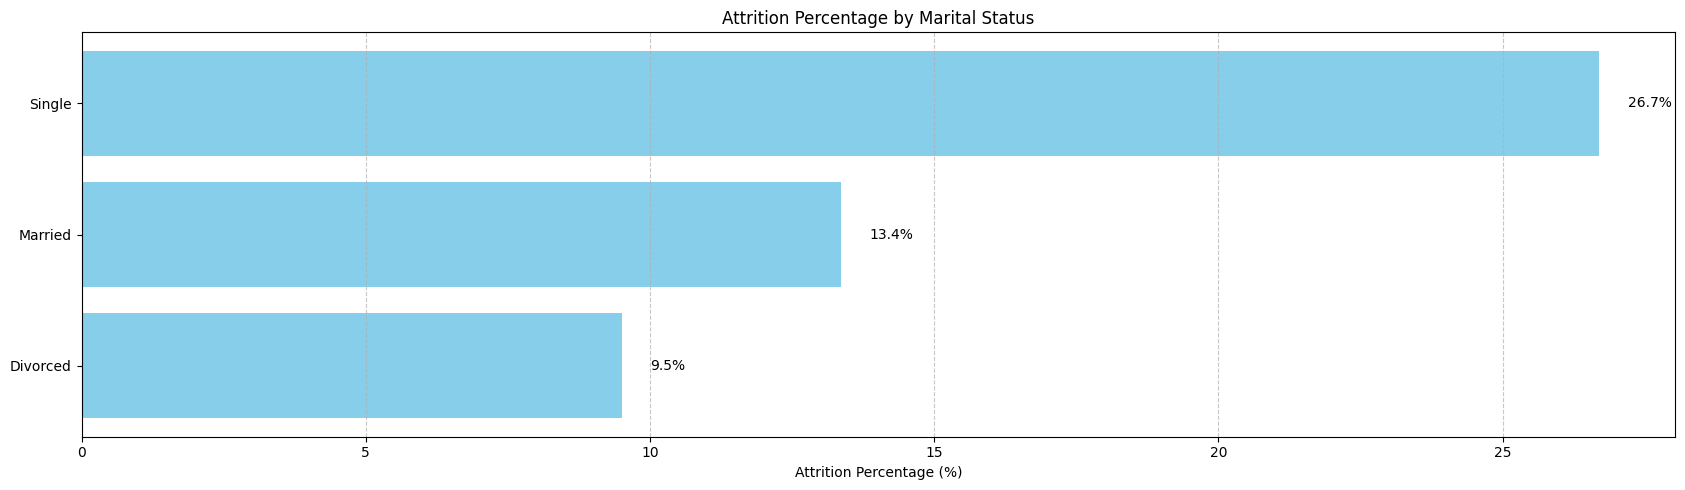

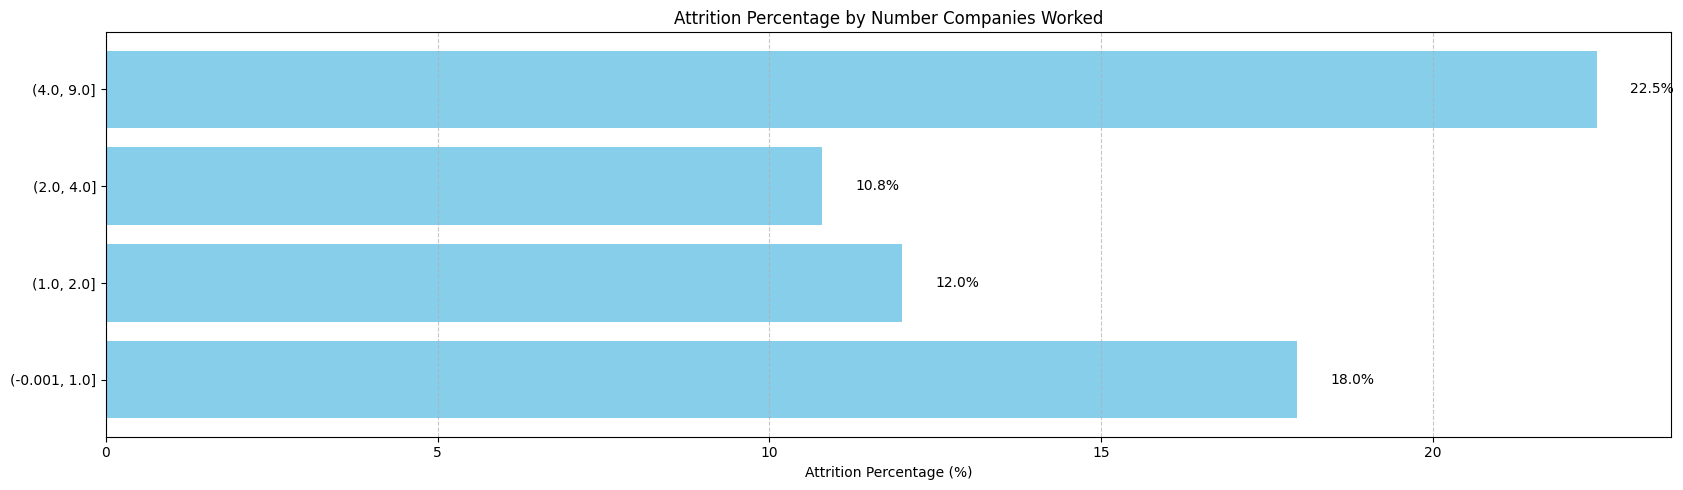

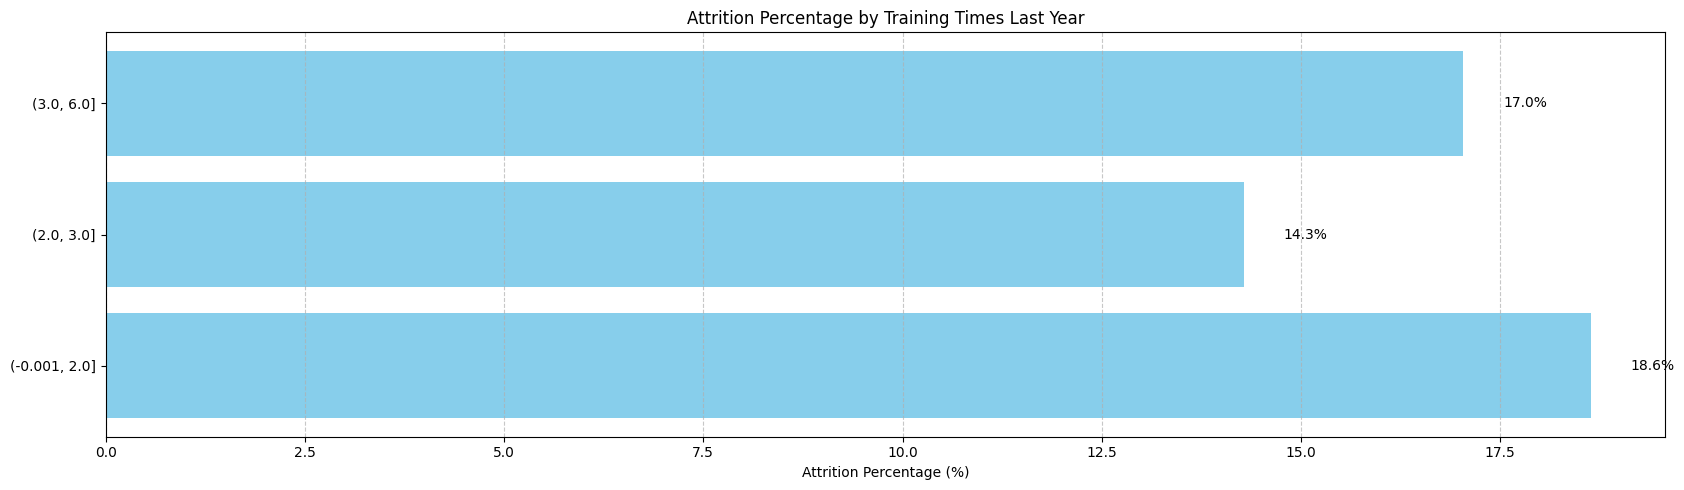

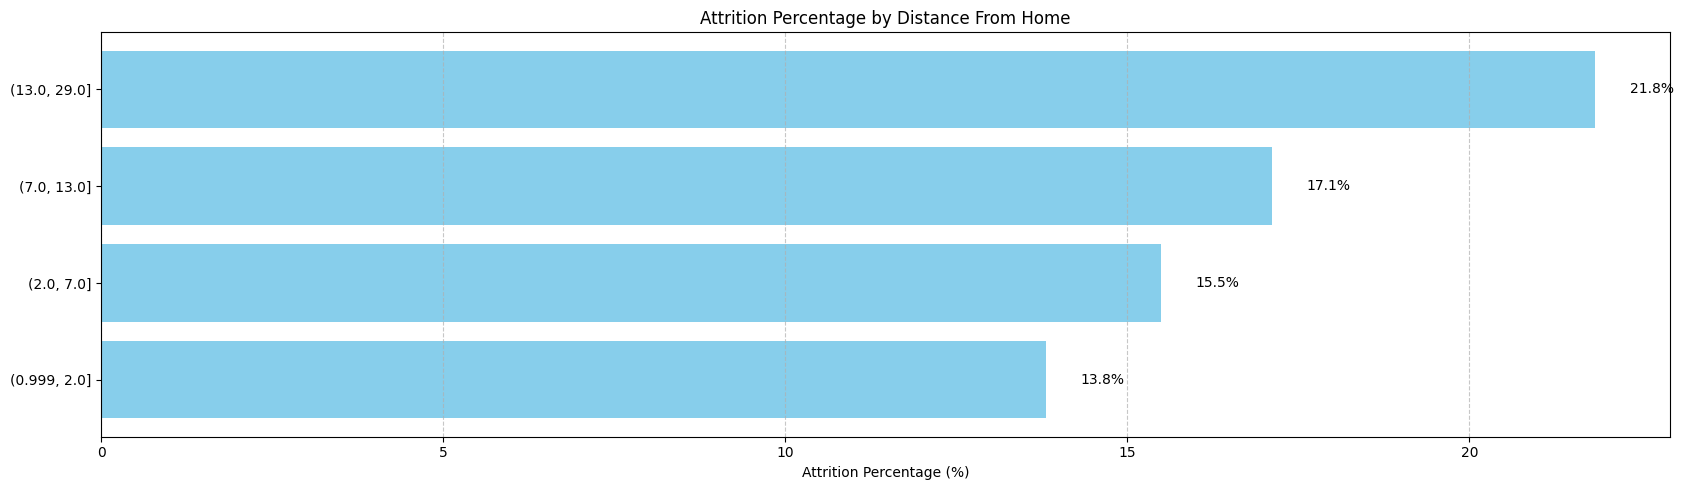

In [130]:
# Personal Life
personal_features = [
    ('WorkLifeBalance', 'Work Life Balance'),
    ('RelationshipSatisfaction', 'Relationship Satisfaction'),
    ('Education', 'Education Level'),
    ('EducationField', 'Education Field'),
    ('MaritalStatus', 'Marital Status'),
    ('NumCompaniesWorked', 'Number Companies Worked'),
    ('TrainingTimesLastYear', 'Training Times Last Year'),
    ('DistanceFromHome', 'Distance From Home')
]

for col, title in personal_features:
    if df[col].dtype != 'category' and df[col].nunique() > 6:
        df[f'{col}_bin'] = pd.qcut(df[col], q=4, duplicates='drop')
        plot_attrition(f'{col}_bin', title)
    else:
        plot_attrition(col, title)

- Tingkat work-life balance yang rendah sangat berkorelasi dengan keputusan karyawan untuk resign. Sebanyak **32.1%** karyawan dengan WLB terendah memilih keluar dari perusahaan, menunjukkan tingkat attrition tertinggi dibanding kelompok lainnya. Namun, kelompok dengan WLB sangat tinggi justru berada di posisi kedua (**19.5%**), disusul oleh kelompok dengan WLB sedang (**17.9%**) dan agak tinggi (**14.7%**). Hal ini mengindikasikan pola yang **tidak linear**, tetapi cukup jelas bahwa karyawan yang merasa tidak seimbang antara kehidupan pribadi dan pekerjaan cenderung lebih rentan untuk meninggalkan perusahaan.
- Karyawan yang tidak puas dengan hubungan menunjukkan tingkat attrition paling tinggi (**22.9%**). Diikuti oleh kelompok dengan tingkat kepuasan sangat tinggi (**16.1%**) dan kelompok yang merasa cukup puas atau sedang (**15.1%**). Meskipun bukan faktor tunggal, **rendahnya kepuasan hubungan di tempat kerja menjadi salah satu indikator penting dalam attrition rate.**
- Karyawan dengan tingkat pendidikan di bawah sarjana memiliki attrition rate sebesar **19.8%**. Namun secara umum, **tidak terlihat pola yang signifikan** antara jenjang pendidikan dan keputusan resign. Artinya, faktor pendidikan tidak dapat disimpulkan sebagai variabel utama yang memengaruhi attrition.
- Karyawan yang berasal dari latar belakang pendidikan teknik terlihat memiliki kecenderungan untuk lebih sering resign dibanding bidang lain. **Ada kemungkinan bahwa lulusan teknik menghadapi tantangan tertentu** dalam pekerjaan mereka, baik dari sisi tuntutan teknis atau ekspektasi yang tidak sesuai, tetapi tidak menjadi faktor yang signifikan.
- Karyawan **single memiliki attrition rate tertinggi yaitu 26.7%**, hampir dua kali lipat dibandingkan karyawan yang telah menikah (**13.4%**). Sementara itu, karyawan yang telah bercerai justru cenderung lebih stabil. **Hal ini mengindikasikan bahwa karyawan single lebih rentan terhadap keputusan untuk resign**, karena ada kemungkinan mobilitas yang lebih fleksibel atau harapan karier yang lebih dinamis.
- Karyawan yang pernah bekerja di **4–9 perusahaan memiliki tingkat attrition tertinggi**, mengindikasikan kecenderungan job-hopping yang tinggi. Namun, menariknya, karyawan dengan pengalaman di **0–1 perusahaan** juga menunjukkan attrition rate yang relatif tinggi. Ini mengindikasikan bahwa **pengalaman kerja sebelumnya tidak selalu menjadi faktor utama** dalam keputusan resign — bisa jadi karena faktor internal lainnya seperti ketidakcocokan budaya perusahaan atau harapan yang tidak terpenuhi.
- Tidak ditemukan **pola yang signifikan** antara frekuensi pelatihan dan keputusan resign. Baik kelompok yang hanya mengikuti 0–2 kali pelatihan (**18.6%**) maupun yang mengikuti 3–6 kali (**17%**) menunjukkan attrition rate tinggi. Ini mengisyaratkan bahwa pelatihan saja **tidak cukup** untuk menahan karyawan dari keputusan resign — **konteks dan kualitas pelatihan mungkin lebih penting** dari sekadar kuantitas.
- Faktor jarak rumah ke kantor memberikan **pola yang cukup jelas dan linear**. Semakin jauh jarak yang ditempuh, semakin tinggi kemungkinan karyawan untuk resign. Karyawan dengan **jarak terjauh memiliki attrition rate sebesar 21.8%**, menjadikan fitur ini **salah satu kandidat kuat sebagai faktor yang memengaruhi keputusan resign.**

### Potensi Faktor-Faktor yang Memengaruhi Attrition

In [131]:
categorical_columns = df.select_dtypes(include=['category']).columns
chi_square_results = {}

for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['Attrition'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[col] = {
        'chi2_statistic': chi2,
        'p_value': p,
        'dof': dof
    }

chi_square_df = pd.DataFrame(chi_square_results).T.sort_values(by='p_value')
print(chi_square_df)

                           chi2_statistic       p_value  dof
OverTime                        67.763459  1.843342e-16  1.0
JobRole                         66.393971  2.556695e-11  8.0
AgeGroup                        48.794749  1.442525e-10  3.0
MonthlyIncome_bin               41.633691  4.798445e-09  3.0
MaritalStatus                   37.621652  6.769585e-09  2.0
BusinessTravel                  13.403348  1.228853e-03  2.0
NumCompaniesWorked_bin          12.763898  5.176031e-03  3.0
StockOptionLevel_bin             6.657304  9.875019e-03  1.0
DistanceFromHome_bin             6.972952  7.276491e-02  3.0
EducationField                   9.811529  8.075507e-02  5.0
Department                       4.627283  9.890046e-02  2.0
DailyRate_bin                    4.559229  2.070676e-01  3.0
TrainingTimesLastYear_bin        2.708009  2.582042e-01  2.0
MonthlyRate_bin                  2.519932  4.716998e-01  3.0
HourlyRate_bin                   1.688084  6.395863e-01  3.0
Gender                  

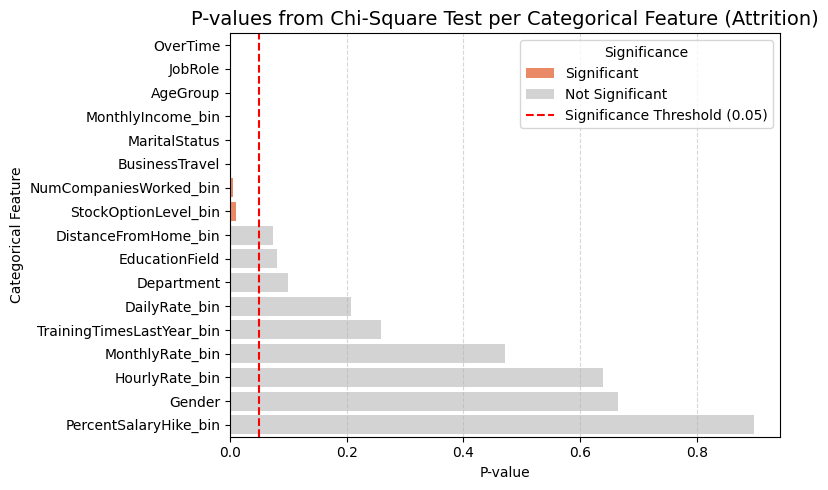

In [132]:
chi_square_df['Significance'] = chi_square_df['p_value'].apply(lambda p: 'Significant' if p < 0.05 else 'Not Significant')
chi_square_sorted = chi_square_df.sort_values(by='p_value')

plt.figure(figsize=(8, 5))
sns.barplot(
    data=chi_square_sorted.reset_index(),
    x='p_value',
    y='index',
    hue='Significance',
    palette={'Significant': 'coral', 'Not Significant': 'lightgrey'}
)
plt.axvline(0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.title('P-values from Chi-Square Test per Categorical Feature (Attrition)', fontsize=14)
plt.xlabel('P-value')
plt.ylabel('Categorical Feature')
plt.legend(title='Significance')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Faktor yang Paling Signifikan (p < 0.01)**
- `OverTime`: Karyawan lembur lebih rentan keluar.
- `JobRole`: Peran jabatan berpengaruh besar.
- `AgeGroup` atau `Age`: Usia punya pengaruh besar.
- `MonthlyIncome`: Pendapatan bulanan mempengaruhi keputusan resign.
- `MaritalStatus`: Status pernikahan berhubungan dengan stabilitas kerja.

**Signifikan Moderat (0.01 ≤ p < 0.05)**
- `BusinessTravel`: Perjalanan bisnis mungkin menjadi penyebab attrition rate tinggi.
- `NumCompaniesWorked`: Orang yang sering ganti kerja, cenderung resign.
- `StockOptionLevel`: Opsi saham mungkin mempengaruhi retensi, meskipun kecil.

**Tidak Signifikan Secara Statistik (p ≥ 0.05)**
- `Gender`: Tidak ada bukti kuat bahwa gender dapat memengaruhi attrition.
- `Department`: Dapat dikatakan hampir signifikan, tetapi belum cukup kuat.

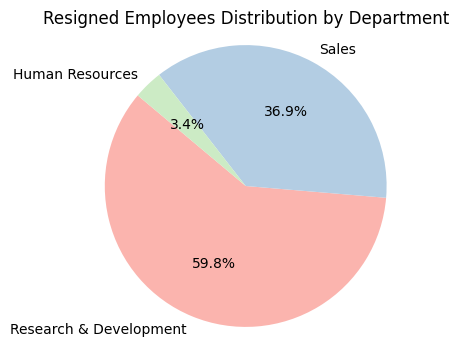

In [133]:
resigned_df = df[df['Attrition'] == 1]
resign_counts = resigned_df['Department'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(resign_counts, labels=resign_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Resigned Employees Distribution by Department')
plt.axis('equal')
plt.show()

Meskipun `Department` kurang berpengaruh dalam attrition rate, tetapi dapat terlihat bahwa Departemen Research and Development lebih banyak menyumbang jumlah karyawan yang mundur. Hal ini dapat disebabkan oleh workload atau lingkungan kerja dalam departemen tersebut kurang nyaman bagi karyawan. Namun perlu diingat bahwa suatu departemen terdiri dari berbagai level posisi pekerja sehingga kurang relevan untuk menjadi faktor yang dapat memengaruhi attrition rate.

In [134]:
stay = df[df['Attrition'] == 0]['PercentSalaryHike']
leave = df[df['Attrition'] == 1]['PercentSalaryHike']

t_stat, p_value = ttest_ind(stay, leave, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -0.15658756102919225
P-value: 0.8756956155120305


- P-value jauh lebih besar dari 0.05 sehingga dapat dikatakan tidak signifikan secara statistik.
- Rata-rata `PercentSalaryHike` antara karyawan yang keluar dan yang tetap tidak berbeda secara signifikan.
- Kenaikan gaji bukan faktor besar penentu dalam keputusan keluar dari perusahaan

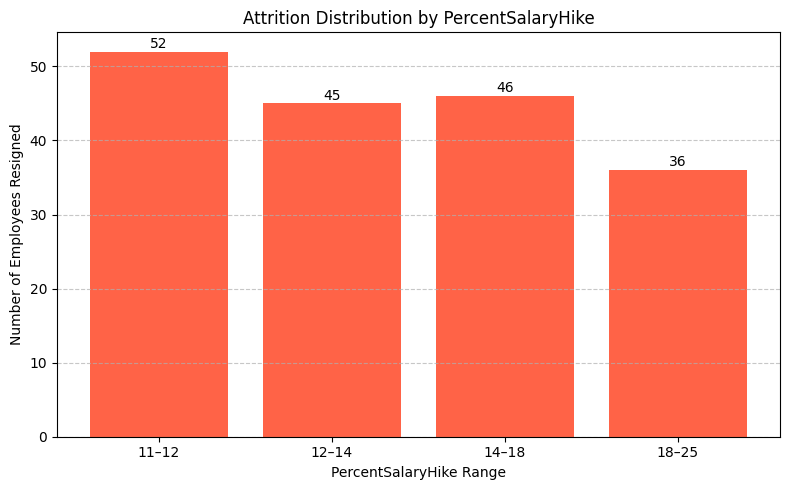

In [135]:
quartiles = pd.qcut(df['PercentSalaryHike'], q=4)
df['SalaryHikeQuartile'] = quartiles
quartile_labels = [f'{interval.left:.0f}–{interval.right:.0f}' for interval in quartiles.cat.categories]
resign_count_by_quartile = df[df['Attrition'] == 1].groupby('SalaryHikeQuartile').size()
plt.figure(figsize=(8, 5))
bars = plt.bar(quartile_labels, resign_count_by_quartile, color='tomato')
plt.ylabel('Number of Employees Resigned')
plt.xlabel('PercentSalaryHike Range')
plt.title('Attrition Distribution by PercentSalaryHike')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for index, value in enumerate(resign_count_by_quartile):
    plt.text(index, value + 0.5, f'{int(value)}', ha='center')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Meskipun `PercentSalaryHike` kurang berpengaruh dalam attrition rate, tetapi dapat terlihat bahwa dengan persentase 11-18 PercentSalaryHike dapat membuat karyawan memilih untuk resign. Namun perlu diingat bahwa suatu percentSalaryHike terdiri dari berbagai level posisi pekerja dan bidangnya sehingga kurang relevan untuk menjadi faktor yang dapat memengaruhi attrition rate.

In [136]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()
numeric_columns.remove('Attrition')
results = []

for col in numeric_columns:
    group0 = df[df['Attrition'] == 0][col]
    group1 = df[df['Attrition'] == 1][col]

    stat, p = ttest_ind(group0, group1, equal_var=False)
    results.append({'Feature': col, 'T-stat': stat, 'P-value': p})
ttest_df = pd.DataFrame(results)
ttest_df['Significance'] = ttest_df['P-value'].apply(lambda p: 'Significant' if p < 0.05 else 'Not Significant')
significant_df = ttest_df[ttest_df['Significance'] == 'Significant'].sort_values(by='P-value')
not_significant_df = ttest_df[ttest_df['Significance'] == 'Not Significant'].sort_values(by='P-value')

print("Significant:")
print(significant_df[['Feature', 'T-stat', 'P-value']])
print("\nNot Significant:")
print(not_significant_df[['Feature', 'T-stat', 'P-value']])

Significant:
                    Feature    T-stat       P-value
10            MonthlyIncome  6.395960  5.781879e-10
17        TotalWorkingYears  6.194640  2.155990e-09
8                  JobLevel  6.149297  2.628893e-09
23     YearsWithCurrManager  5.679273  3.325215e-08
21       YearsInCurrentRole  5.680244  3.369947e-08
16         StockOptionLevel  5.659923  3.890578e-08
1                       Age  5.414129  1.468269e-07
20           YearsAtCompany  4.555875  7.992509e-06
7            JobInvolvement  4.497334  1.080206e-05
5   EnvironmentSatisfaction  4.143636  4.714832e-05
9           JobSatisfaction  2.998323  2.981841e-03
3          DistanceFromHome -2.418820  1.630326e-02

Not Significant:
                     Feature    T-stat   P-value
19           WorkLifeBalance  1.716764  0.087365
2                  DailyRate  1.696021  0.091096
15  RelationshipSatisfaction  1.654481  0.099314
18     TrainingTimesLastYear  1.521272  0.129454
12        NumCompaniesWorked -1.152255  0.250347

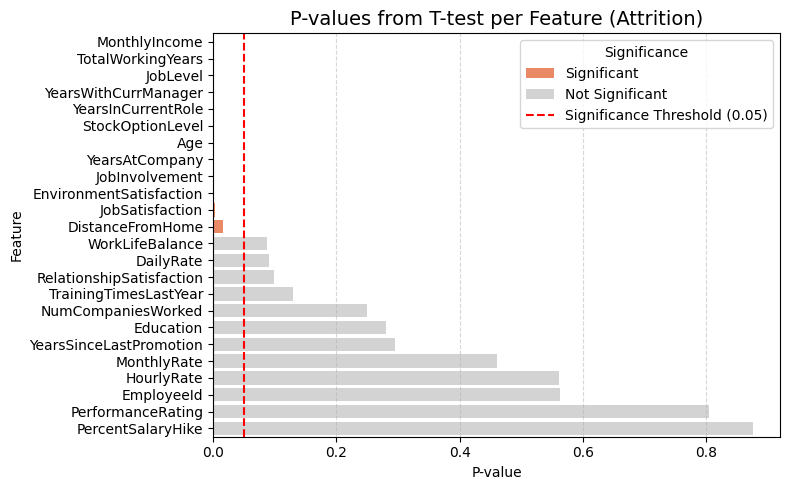

In [137]:
ttest_df_sorted = ttest_df.sort_values(by='P-value')

plt.figure(figsize=(8, 5))
sns.barplot(
    data=ttest_df_sorted,
    x='P-value',
    y='Feature',
    hue='Significance',
    palette={'Significant': 'coral', 'Not Significant': 'lightgrey'}
)
plt.axvline(0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.title('P-values from T-test per Feature (Attrition)', fontsize=14)
plt.xlabel('P-value')
plt.ylabel('Feature')
plt.legend(title='Significance')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Fitur numerik yang paling mungkin berpengaruh terhadap attrition rate:

- Faktor kompensasi dan jabatan: `MonthlyIncome`, `JobLevel`, `StockOptionLevel`

- Faktor pengalaman dan stabilitas: `TotalWorkingYears`, `YearsAtCompany`, `YearsInCurrentRole`, `YearsWithCurrManager`

- Faktor lingkungan kerja: `JobInvolvement`, `JobSatisfaction`, `EnvironmentSatisfaction`

- Faktor demografis: `Age`, `DistanceFromHome`

### Faktor Langsung vs Faktor Tidak Langsung yang Memengaruhi Attrition Rate

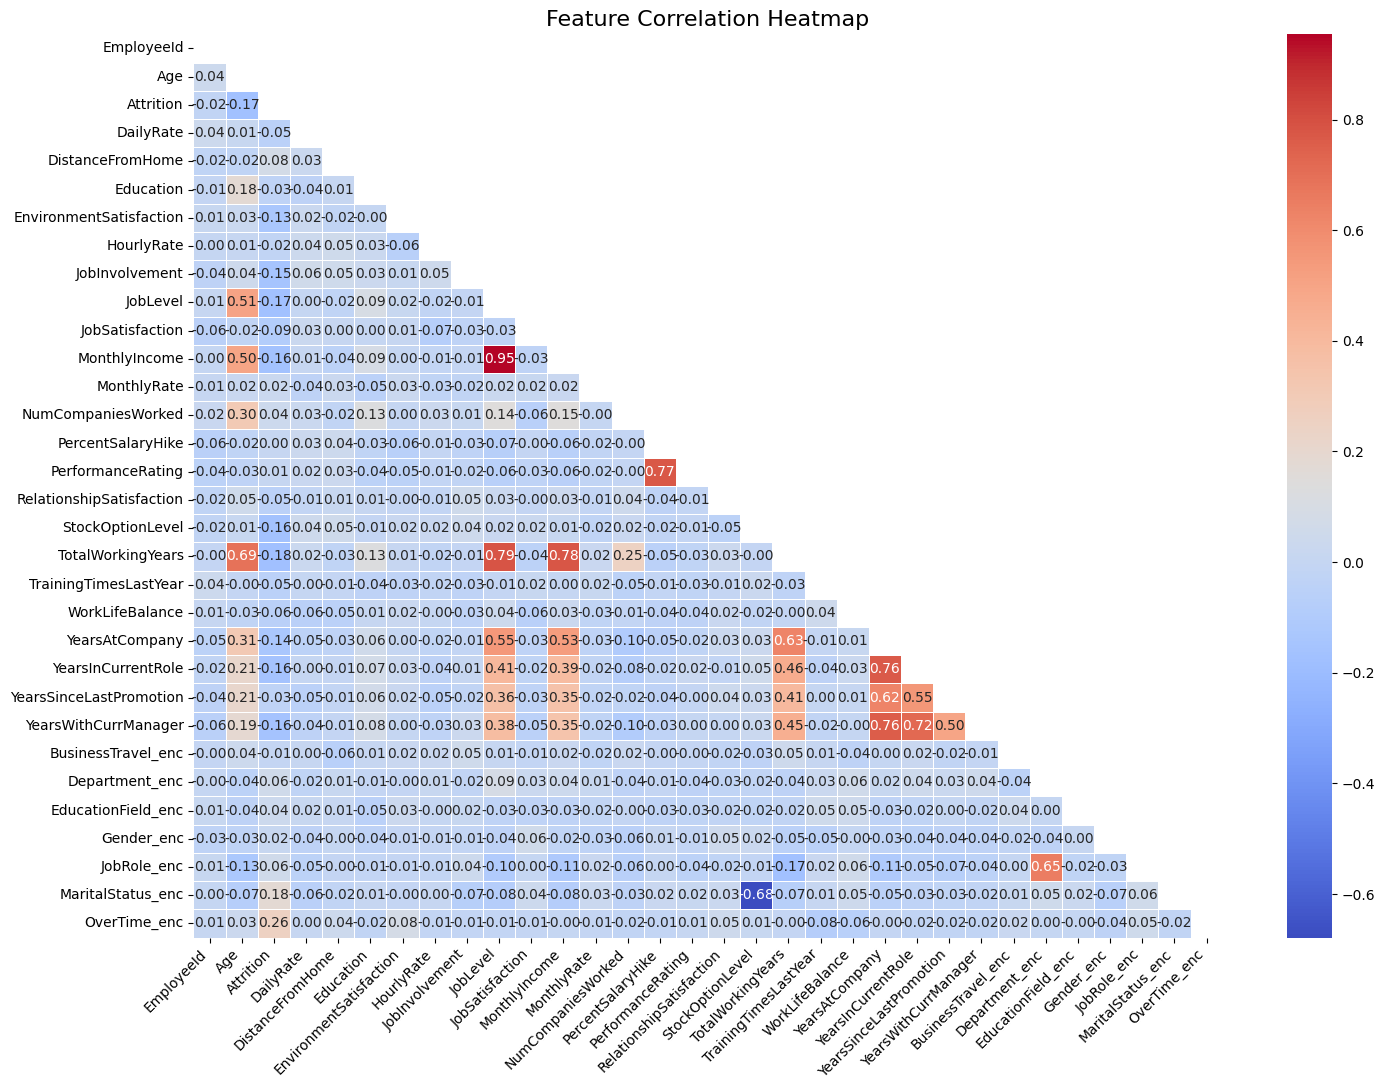

In [138]:
df_encoded = df.copy()

categorical_cols = [
    'BusinessTravel', 'Department', 'EducationField',
    'Gender', 'JobRole', 'MaritalStatus', 'OverTime'
]

le = LabelEncoder()

for col in categorical_cols:
    df_encoded[col + '_enc'] = le.fit_transform(df_encoded[col])

numeric_df = df_encoded.select_dtypes(include=['int64'])
corr_matrix = numeric_df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(15, 11))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f",
            cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Berhubung `p_value` yang telah menentukan faktor signifikan terhadap attrition rate, heatmap di atas membantu menentukan fitur yang dapat memengaruhi faktor signifikan sehingga secara tak langsung, fitur tersebut memengaruhi keputusan untuk resign.
- **`JobLevel`** sangat berkorelasi dengan **`MonthlyIncome` (0.95)**, sehingga posisi yang lebih tinggi berkontribusi terhadap penghasilan lebih tinggi, yang pada akhirnya menurunkan attrition.
- **`TotalWorkingYears`** berperan penting karena berkorelasi tinggi dengan **`MonthlyIncome` (0.78)** dan juga dengan **`Age` (0.69)**. Semakin lama pengalaman kerja, cenderung berpenghasilan lebih tinggi dan berusia lebih matang, yang keduanya menurunkan attrition rate.
- **`YearsAtCompany`, `YearsInCurrentRole`, `YearsWithCurrManager`, dan `YearsSinceLastPromotion`** masing-masing memiliki korelasi moderat dengan **`Age`** **(0.4–0.6)**. Dengan bertambahnya masa kerja, karyawan cenderung lebih stabil.
- **`WorkLifeBalance`** dan **`JobInvolvement`** menunjukkan pengaruh terhadap **`OverTime`**. Karyawan dengan work-life balance yang buruk atau keterlibatan kerja yang tinggi cenderung lebih sering lembur, yang pada akhirnya meningkatkan attrition rate.
- **`Age`** juga memengaruhi **`MaritalStatus` (korelasi 0.31)**. Karyawan yang lebih tua cenderung sudah menikah.

Beberapa fitur lain memiliki korelasi sangat rendah dengan attrition. Oleh karena itu, perannya dalam memengaruhi keputusan resign dianggap tidak signifikan. `Gender`, `Department`, `Education`, `EducationField`, `DailyRate`, `HourlyRate`, dan `PerformanceRating`

In [139]:
df.to_csv('employee_eda.csv', index=False)

### Kesimpulan
- Faktor signifikan yang memengaruhi attrition (berdasarkan uji p-value & korelasi) adalah:
  - `OverTime`: Karyawan yang lembur memiliki kemungkinan lebih besar untuk keluar
  - `JobRole`: Peran jabatan tertentu memiliki attrition rate yang tinggi
  - `Age`: Kelompok usia muda lebih rentan resign
  - `MonthlyIncome`: Karyawan dengan penghasilan rendah lebih mungkin keluar
  - `MaritalStatus`: Karyawan single memiliki attrition rate paling tinggi
  - `BusinessTravel`: Perjalanan bisnis tinggi meningkatkan attrition rate
  - `NumCompaniesWorked`: Semakin sering pindah kerja sebelumnya, semakin rentan keluar
  - `StockOptionLevel`: Meskipun pengaruhnya kecil, opsi saham masih relevan
- `Gender`, `PercentSalaryHike`, dan `Department` tidak memiliki pengaruh signifikan
- Faktor-faktor `DistanceFromHome`, `RelationshipSatisfaction`, `JobLevel`, `TotalWorkingYears`, `YearsAtCompany`, `YearsInCurrentRole`, `YearsWithCurrManager`,  `YearsSinceLastPromotion`, `WorkLifeBalance`, `JobInvolvement`, `Education`, `EducationField`, `DailyRate`, `HourlyRate`, `PerformanceRating`, dan `TrainingTimesLastYear` memiliki potensi pengaruh tidak langsung terhadap keputusan resign.

## Action Items

### A. Untuk Mengurangi Attrition Rate
1. **Kurangi Beban Lembur Berlebih**  
  - Lakukan evaluasi beban kerja dan alokasi ulang jika perlu. Karyawan lembur memiliki attrition tertinggi.
    - Karyawan yang lembur (OverTime tinggi) memiliki attrition rate sebesar 30.2%. Sementara karyawan tanpa lembur hanya 11.2%.
2. **Tingkatkan Benefit dan Apresiasi untuk Job Role yang Rentan Resign**  
  - Identifikasi job role, terutama bidang yang bersinggungan langsung dengan Marketing dan Teknis dengan attrition tinggi, dan beri penghargaan atau program kesejahteraan.
    - Role seperti Sales Representative dan Laboratory Technician memiliki attrition rate di atas 25%. Sedangkan Research Director hanya 6.3%.
3. **Fokus pada Karyawan Muda dan Single**  
  - Berikan program mentoring, benefit, lingkungan kerja, dan pengembangan karir yang jelas. Karyawan muda dan single paling banyak resign.
    - Karyawan usia < 30 tahun memiliki attrition rate hingga 34.5%. Karyawan single memiliki attrition 26.7%, jauh lebih tinggi dari yang menikah (13.4%) atau cerai (8%).
4. **Evaluasi Struktur Gaji & Tunjangan**  
  - Karyawan berpendapatan rendah lebih cenderung resign. Lakukan benchmarking gaji dan berikan kompensasi yang non-finansial.
    - Karyawan dengan pendapatan < 5000 memiliki attrition rate > 25%, sedangkan > 9000 hanya ~8%.
5. **Kurangi Frekuensi Perjalanan Bisnis Tidak Perlu**  
  - BusinessTravel tinggi bisa mengganggu work-life balance. Evaluasi kebutuhan dan efisiensi perjalanan.
    - Karyawan Frequent Travel mencapai attrition ~27.5%, sedangkan Karyawan Non-Travel hanya ~11%.
6. **Tawarkan Retention Program untuk High Jumper**  
  - Bagi yang memiliki riwayat kerja berpindah-pindah, beri program pengembangan dan benefit jangka panjang agar merasa tertaut dengan perusahaan.
    - Karyawan dengan riwayat kerja di 4-9 perusahaan mencapai attrition > 28%.

### B. Untuk Meningkatkan Retensi Jangka Panjang
1. **Program Work-Life Balance**  
  - Sediakan fleksibilitas waktu kerja, mental health day, dan ruang istirahat untuk menurunkan stres kerja.
2. **Penguatan Budaya Organisasi**  
  - Program engagement, feedback loop karyawan, dan pelatihan atasan dalam komunikasi bisa menurunkan keinginan resign.
3. **Perbaiki Hubungan Karyawan-Atasan**  
  - Hubungan yang baik dengan atasan bisa mencegah attrition.

## Modeling

### Training Data Preprocessing

In [157]:
df = pd.read_csv('employee_cleaned.csv')

categorical_cols = ['BusinessTravel', 'Department', 'EducationField',
                    'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

joblib.dump(encoders, 'label_encoders.pkl')
df.to_csv('employee_data_modeling.csv', index=False)

In [158]:
df = pd.read_csv('employee_data_modeling.csv')

df['AgeGroup'] = pd.cut(df['Age'], bins=[17, 25, 35, 45, 60], labels=[0, 1, 2, 3])
df['IncomePerYear'] = df['MonthlyIncome'] * 12
df['WorkSatisfaction'] = df['EnvironmentSatisfaction'] + df['JobSatisfaction']
df['RoleSeniorityRatio'] = df['YearsInCurrentRole'] / df['TotalWorkingYears'].replace(0, 1)
df['YearsInCompanyRatio'] = df['YearsAtCompany'] / df['TotalWorkingYears'].replace(0, 1)
df['SeniorityLevel'] = df['JobLevel'] * df['PerformanceRating']
df = df.drop(columns=['Age', 'MonthlyIncome'])
df = df.drop('EmployeeId', axis=1)

X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

### Deep Learning and XGBoost Ensemble Modeling

In [159]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)

#XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_sm, y_train_sm)
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Deep Learning
model = Sequential([
    Dense(128, input_dim=X_train_sm.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_sm, y_train_sm, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, verbose=1)

y_proba_dl = model.predict(X_test_scaled).flatten()
y_pred_dl = (y_proba_dl > 0.5).astype(int)
y_proba_ensemble = (y_proba_xgb + y_proba_dl) / 2
y_pred_ensemble = (y_proba_ensemble > 0.5).astype(int)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5947 - loss: 0.7739 - val_accuracy: 0.8019 - val_loss: 0.4995
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7520 - loss: 0.5241 - val_accuracy: 0.7547 - val_loss: 0.4912
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8149 - loss: 0.4176 - val_accuracy: 0.7547 - val_loss: 0.4815
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7893 - loss: 0.4385 - val_accuracy: 0.7453 - val_loss: 0.4746
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8545 - loss: 0.3508 - val_accuracy: 0.7594 - val_loss: 0.4782
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8663 - loss: 0.3183 - val_accuracy: 0.7736 - val_loss: 0.4712
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8700 - loss: 0.2991 - val_accuracy: 0.7594 - val_loss: 0.4858
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8637 - loss: 0.3062 - val_accuracy: 0.7500 - val_loss

## Evaluation

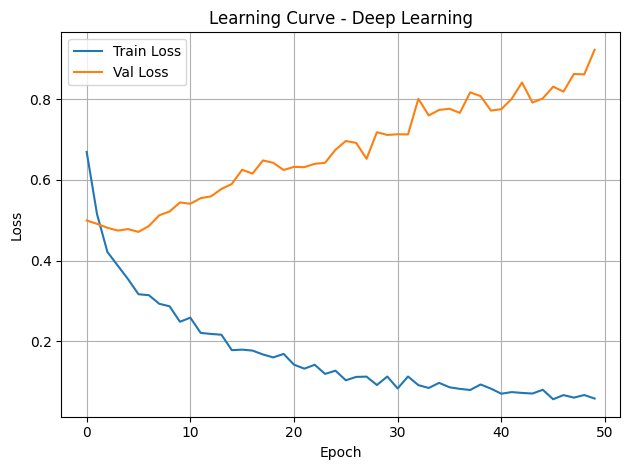

In [160]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Learning Curve - Deep Learning")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Ensemble Classification Report
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       176
           1       0.52      0.44      0.48        36

    accuracy                           0.83       212
   macro avg       0.70      0.68      0.69       212
weighted avg       0.83      0.83      0.83       212

Confusion Matrix


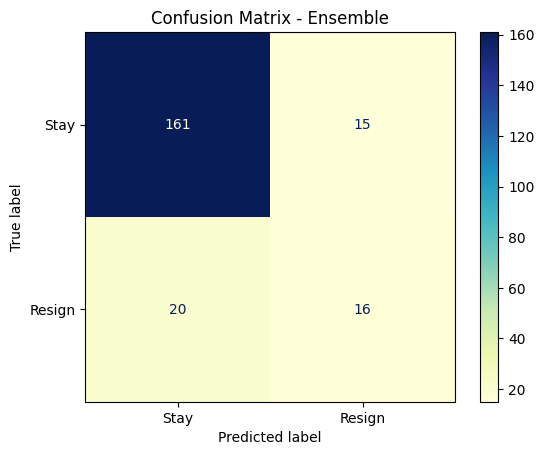

In [161]:
print("Ensemble Classification Report")
print(classification_report(y_test, y_pred_ensemble))

print("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred_ensemble)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Stay", "Resign"])
disp.plot(cmap="YlGnBu")
plt.title("Confusion Matrix - Ensemble")
plt.show()

Akurasi: 0.8349
Log Loss: 0.4401
ROC AUC: 0.8103


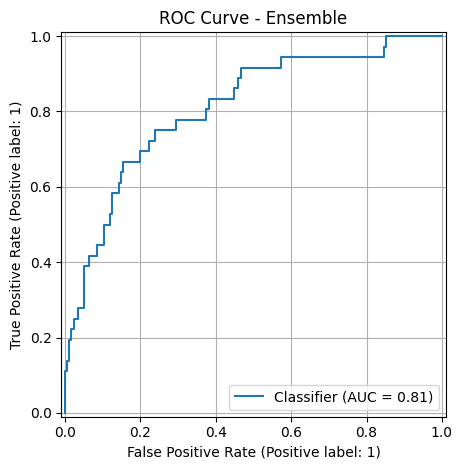

In [162]:
print(f"Akurasi: {accuracy_score(y_test, y_pred_ensemble):.4f}")
print(f"Log Loss: {log_loss(y_test, y_proba_ensemble):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_ensemble):.4f}")

RocCurveDisplay.from_predictions(y_test, y_proba_ensemble)
plt.title("ROC Curve - Ensemble")
plt.grid(True)
plt.tight_layout()
plt.show()

## Model Saving

In [163]:
joblib.dump(xgb_model, 'xgb_model.pkl')
model.save('dl_model.h5')
model.save('dl_model.keras')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## Python Script

In [177]:
!pip install pandas scikit-learn xgboost tensorflow

import joblib
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

from IPython.display import display
from ipywidgets import FileUpload
import io

# load
xgb_model = joblib.load('xgb_model.pkl')
dl_model = load_model('dl_model.h5')
scaler = joblib.load('scaler.pkl')
encoders = joblib.load('label_encoders.pkl')

categorical_cols = list(encoders.keys())
all_columns = [
    'EmployeeId', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
    'Education', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
    'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
    'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
    'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

def input_manual():
    print("\nAnda memilih input manual.")
    print("Silakan masukkan data karyawan sesuai petunjuk yang muncul.\n")

    data = {}
    data['EmployeeId'] = int(input("EmployeeId: "))
    data['Age'] = int(input("Age: "))

    print("BusinessTravel Options: 'Travel_Frequently', 'Travel_Rarely', 'Non-Travel'")
    data['BusinessTravel'] = input("BusinessTravel: ")

    data['DailyRate'] = int(input("DailyRate: "))

    print("Department Options: 'Human Resources', 'Research & Development', 'Sales'")
    data['Department'] = input("Department: ")

    data['DistanceFromHome'] = int(input("DistanceFromHome: "))

    print("Education (1-5)")
    data['Education'] = int(input("Education: "))

    print("EducationField Options: 'Other', 'Medical', 'Life Sciences', 'Marketing', 'Technical Degree', 'Human Resources'")
    data['EducationField'] = input("EducationField: ")

    data['EmployeeCount'] = int(input("EmployeeCount: "))

    print("EnvironmentSatisfaction (1-4)")
    data['EnvironmentSatisfaction'] = int(input("EnvironmentSatisfaction: "))

    print("Gender Options: 'Male', 'Female'")
    data['Gender'] = input("Gender: ")

    data['HourlyRate'] = int(input("HourlyRate: "))

    print("JobInvolvement (1-4)")
    data['JobInvolvement'] = int(input("JobInvolvement: "))

    print("JobLevel (1-5)")
    data['JobLevel'] = int(input("JobLevel: "))

    print("JobRole Options: 'Human Resources', 'Healthcare Representative', 'Research Scientist', 'Sales Executive',\n                  'Manager', 'Laboratory Technician', 'Research Director', 'Manufacturing Director', 'Sales Representative'")
    data['JobRole'] = input("JobRole: ")

    print("JobSatisfaction (1-4)")
    data['JobSatisfaction'] = int(input("JobSatisfaction: "))

    print("MaritalStatus Options: 'Married', 'Single', 'Divorced'")
    data['MaritalStatus'] = input("MaritalStatus: ")

    data['MonthlyIncome'] = int(input("MonthlyIncome: "))
    data['MonthlyRate'] = int(input("MonthlyRate: "))
    data['NumCompaniesWorked'] = int(input("NumCompaniesWorked: "))

    print("Over18: hanya 'Y' yang diperbolehkan")
    data['Over18'] = 'Y'

    print("OverTime Options: 'Yes', 'No'")
    data['OverTime'] = input("OverTime: ")

    data['PercentSalaryHike'] = int(input("PercentSalaryHike: "))

    print("PerformanceRating (1-4)")
    data['PerformanceRating'] = int(input("PerformanceRating: "))

    print("RelationshipSatisfaction (1-4)")
    data['RelationshipSatisfaction'] = int(input("RelationshipSatisfaction: "))

    data['StandardHours'] = int(input("StandardHours: "))

    print("StockOptionLevel (0-3)")
    data['StockOptionLevel'] = int(input("StockOptionLevel: "))

    data['TotalWorkingYears'] = int(input("TotalWorkingYears: "))
    data['TrainingTimesLastYear'] = int(input("TrainingTimesLastYear: "))

    print("WorkLifeBalance (1-4)")
    data['WorkLifeBalance'] = int(input("WorkLifeBalance: "))

    data['YearsAtCompany'] = int(input("YearsAtCompany: "))
    data['YearsInCurrentRole'] = int(input("YearsInCurrentRole: "))
    data['YearsSinceLastPromotion'] = int(input("YearsSinceLastPromotion: "))
    data['YearsWithCurrManager'] = int(input("YearsWithCurrManager: "))

    return pd.DataFrame([data])

def load_from_upload():
    print("Silakan upload file CSV Anda:")
    upload_widget = FileUpload(accept='.csv', multiple=False)
    display(upload_widget)

    while not upload_widget.value:
        pass

    uploaded_file = next(iter(upload_widget.value.values()))
    content = uploaded_file['content']
    df = pd.read_csv(io.BytesIO(content))
    print(f"\nFile '{uploaded_file['metadata']['name']}' berhasil.")
    return df

# choice
print("=== MODE INPUT DATA ===")
print("1. Input manual dari terminal")
print("2. Upload file CSV")
mode = input("Pilih 1 atau 2: ")

if mode == "1":
    df = input_manual()
elif mode == "2":
    df = load_from_upload()
else:
    print("Input tidak valid.")
    exit()

# encode
for col in categorical_cols:
    if col in df.columns:
        df[col] = encoders[col].transform(df[col])

# feature engineering
df['AgeGroup'] = pd.cut(df['Age'], bins=[17, 25, 35, 45, 60], labels=[0, 1, 2, 3])
df['IncomePerYear'] = df['MonthlyIncome'] * 12
df['WorkSatisfaction'] = df['EnvironmentSatisfaction'] + df['JobSatisfaction']
df['RoleSeniorityRatio'] = df['YearsInCurrentRole'] / df['TotalWorkingYears'].replace(0, 1)
df['YearsInCompanyRatio'] = df['YearsAtCompany'] / df['TotalWorkingYears'].replace(0, 1)
df['SeniorityLevel'] = df['JobLevel'] * df['PerformanceRating']
drop_cols = ['Age', 'MonthlyIncome', 'EmployeeId', 'Attrition', 'EmployeeCount', 'Over18', 'StandardHours']
df_model = df.drop(columns=drop_cols, errors='ignore')

X_new_scaled = scaler.transform(df_model)

# predict
proba_xgb = xgb_model.predict_proba(X_new_scaled)[:, 1]
proba_dl = dl_model.predict(X_new_scaled).flatten()
proba_ensemble = (proba_xgb + proba_dl) / 2
pred_ensemble = (proba_ensemble > 0.5).astype(int)
df['Attrition_Prediction'] = pred_ensemble
df['Attrition_Probability'] = proba_ensemble

# hasil akhir
if mode == "2":
    df.to_csv('hasil_prediksi.csv', index=False)
    print("\nPrediksi selesai. Hasil disimpan di 'hasil_prediksi.csv'.")
elif mode == "1":
    print("\n=== DETAIL DATA & PREDIKSI ===")
    print(df.to_string(index=False))

=== MODE INPUT DATA ===
1. Input manual dari terminal
2. Upload file CSV
Pilih 1 atau 2: 1

Anda memilih input manual.
Silakan masukkan data karyawan sesuai petunjuk yang muncul.

EmployeeId: 23
Age: 37
BusinessTravel Options: 'Travel_Frequently', 'Travel_Rarely', 'Non-Travel'
BusinessTravel: Travel_Frequently
DailyRate: 900
Department Options: 'Human Resources', 'Research & Development', 'Sales'
Department: Sales
DistanceFromHome: 26
Education (1-5)
Education: 5
EducationField Options: 'Other', 'Medical', 'Life Sciences', 'Marketing', 'Technical Degree', 'Human Resources'
EducationField: Medical
EmployeeCount: 1
EnvironmentSatisfaction (1-4)
EnvironmentSatisfaction: 4
Gender Options: 'Male', 'Female'
Gender: Male
HourlyRate: 90
JobInvolvement (1-4)
JobInvolvement: 4
JobLevel (1-5)
JobLevel: 5
JobRole Options: 'Human Resources', 'Healthcare Representative', 'Research Scientist', 'Sales Executive',
                  'Manager', 'Laboratory Technician', 'Research Director', 'Manufacturing